# Diagnosis of Impacting Factors on Hospital Readmission Rates


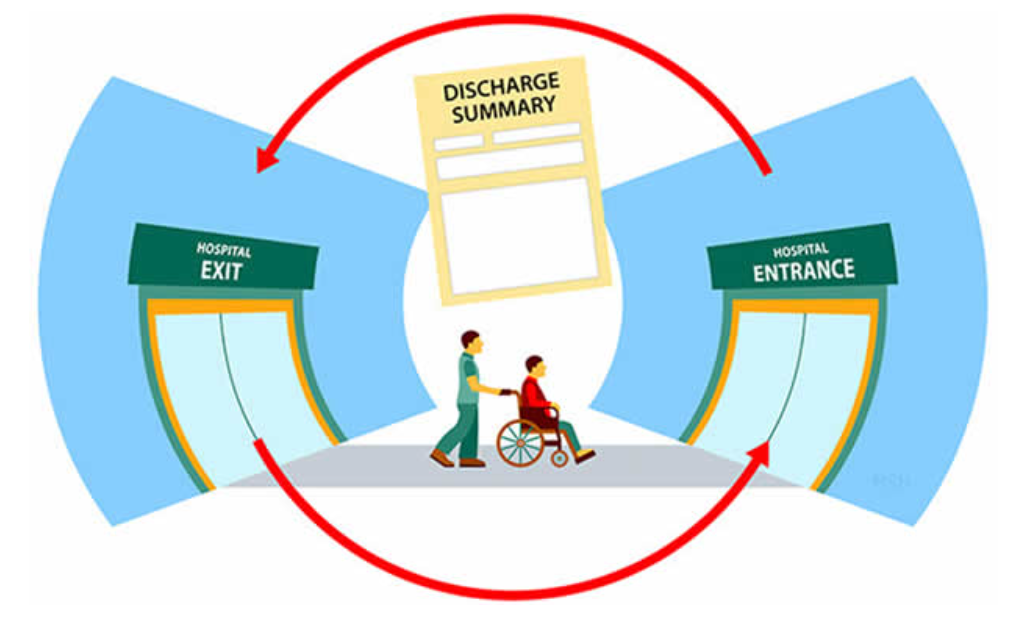


Problem Statement and Objective

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. 

In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used patient records dataset (description below), to answer these questions:

1. What factors are the strongest predictors of hospital readmission in diabetic patients?
2. How well can we predict hospital readmission in this dataset with limited features?

# Data Set Description


**VARIABLE NAMES**: DESCRIPTION
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [1]:
#Importing required libraries
from warnings import filterwarnings 
filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [3]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
#Load the dataset
df=pd.read_csv('diabetic_data.csv')
df.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
weight,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,7,2,2,7
time_in_hospital,1,3,2,2,1,3,4,5


# Stage 1: Descriptive analysis and Preprocessing


In [5]:
#Checking size of dataset
df.shape

(101766, 50)

# Checking null Values

In [6]:
#checking missing values in dataset which are mentioned as '?'
import time
start = time.time()

for i in df.columns:
    print(i, df[i][df[i]=='?'].count())
    
end = time.time()
print('time consumed {} seconds'.format(end-start))

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
time consumed 0.6043727397918701 seconds


null values are found in 7 variables i.e.,  weight, payer code, medical speciality, diag1, diag2, diag3, race.



column: weight
The attribute 'weight' contains approximate 98% of the missing values. Missing values in 'weight' column are not replaced. 
The column 'weight' is dropped.

column: Payer code
Variable 'Payer code' contains approximate 40% missing values.
so this attribute are dropped from the dataframe 'df'.

column: medical specialty
Variable 'medical specialty' contains approximate 50% missing values.
so this attribute are dropped from the dataframe 'df'.

In [7]:
df = df.drop(['weight','payer_code','medical_specialty'], axis=1)
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51


Dealing with Missing Values

columns: diag_1,diag_2,diag_3

In [8]:

#creating a sets of index numbers where diagnosis results (diag_1,diag_2,diag_3) are missing

s1 = set(df[df['diag_1'] == '?'].index)
s2 = set(df[df['diag_2'] == '?'].index)
s3 = set(df[df['diag_3'] == '?'].index)

print(len(s1), len(s2), len(s3))

21 358 1423


Dealing with Missing Values

column: race

In [9]:
s4= set(df[df['race']=='?'].index)
len(s4)

2273

The data of patients who were discharged to hospice or dead is not considered for the analysis to avoid biasing.

In [10]:
s5=set(df[df['discharge_disposition_id'] == 11].index)
len(s5)

1642

The indices with Unknown/invalid values in 'gender' column are dropped.

In [11]:
#Finding unique values in column gender
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [12]:
s6=set(df[df['gender']=='Unknown/Invalid'].index)
len(s6)

3

In [13]:
s7=s1.union(s2,s3,s4,s5,s6)
len(s7)

5320

In [14]:
df.drop(index=s7, inplace=True)

In [15]:
df.shape

(96446, 47)

Collapsing of Multiple Encounters for same patient 

Some patients in the dataset had more than one encounter. We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters.

In [16]:
df1=df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [17]:
df1.shape

(67580, 47)

In [18]:
(96446-67580)*100/96446 

29.92970159467474

The columns encounter_id and patient_nbr are insignificant attributes for the analysis of hospital readmission rate. 
So, both the columns are dropped.

In [19]:
df1.drop(['encounter_id',"patient_nbr"], axis =1 , inplace = True )

variables (drugs named citoglipton and examide), all records have the same value. 

So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

In [20]:
df1.drop(['citoglipton', 'examide'], axis = 1,  inplace = True ) 

For dimensionality reduction, the classes of features with value count less than 0.01 percent are dropped for 'discharge_disposition_id', 'admission_type_id', 'admission_source_id'. 


In [21]:
df1['discharge_disposition_id'].value_counts(normalize=True)

1    0.624889
3    0.126014
6    0.119592
18   0.035898
2    0.021841
22   0.020687
5    0.012800
25   0.010832
4    0.007325
7    0.005712
23   0.003759
13   0.003581
14   0.003181
28   0.001317
8    0.001051
15   0.000592
24   0.000370
9    0.000133
17   0.000118
10   0.000089
19   0.000089
27   0.000044
16   0.000044
12   0.000030
20   0.000015
Name: discharge_disposition_id, dtype: float64

In [22]:
discharge_disposition_id_unique = df1['discharge_disposition_id'].unique()
discharge_disposition_id_unique

array([ 1,  3,  6,  2,  5,  7, 25, 10, 14,  4, 18,  8, 12, 13, 17, 16, 22,
       23,  9, 15, 20, 28, 24, 19, 27], dtype=int64)

In [23]:
len(discharge_disposition_id_unique)

25

In [24]:

for i in discharge_disposition_id_unique:
    if len(df1[df1['discharge_disposition_id']==i]) < 0.01*df1.shape[0]:
        print(i)

7
10
14
4
8
12
13
17
16
23
9
15
20
28
24
19
27


In [25]:
s_7 = set(df1[df1['discharge_disposition_id']==7].index)
s_10 = set(df1[df1['discharge_disposition_id']==10].index)
s_14 = set(df1[df1['discharge_disposition_id']==14].index)
s_4 = set(df1[df1['discharge_disposition_id']==4].index)
s_8 = set(df1[df1['discharge_disposition_id']==8].index)
s_12 = set(df1[df1['discharge_disposition_id']==12].index)
s_13 = set(df1[df1['discharge_disposition_id']==13].index)
s_17 = set(df1[df1['discharge_disposition_id']==17].index)
s_16 = set(df1[df1['discharge_disposition_id']==16].index)
s_23 = set(df1[df1['discharge_disposition_id']==23].index)
s_9 = set(df1[df1['discharge_disposition_id']==9].index)
s_15 = set(df1[df1['discharge_disposition_id']==15].index)
s_20 = set(df1[df1['discharge_disposition_id']==20].index)
s_28 = set(df1[df1['discharge_disposition_id']==28].index)
s_24 = set(df1[df1['discharge_disposition_id']==24].index)
s_19 = set(df1[df1['discharge_disposition_id']==19].index)
s_27 = set(df1[df1['discharge_disposition_id']==27].index)
s_discharge_disposition_id= s_7.union(s_10, s_14, s_4, s_8, s_12, s_13, s_17, s_16, s_23, s_9 , s_15, s_20, s_28 , s_24, s_19, s_27)
len(s_discharge_disposition_id)

1855

In [26]:
df1['admission_type_id'].value_counts(normalize=True)

1   0.509307
3   0.197070
2   0.179284
6   0.064886
5   0.044880
8   0.004188
7   0.000252
4   0.000133
Name: admission_type_id, dtype: float64

In [27]:
admission_type_id_unique = df1['admission_type_id'].unique()
admission_type_id_unique

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [28]:
for i in admission_type_id_unique:
    if len(df1[df1['admission_type_id']==i]) < 0.01*df1.shape[0]:
        print(i)

4
8
7


In [29]:
ss_7 = set(df1[df1['admission_type_id']==7].index)
ss_8 = set(df1[df1['admission_type_id']==8].index)
ss_4 = set(df1[df1['admission_type_id']==4].index)
s_admission_type_id= ss_7.union( ss_4, ss_8)
len(s_admission_type_id)

309

In [30]:
df1['admission_source_id'].value_counts(normalize=True)

7    0.539139
1    0.309204
17   0.069932
4    0.034700
6    0.021930
2    0.012504
5    0.007517
20   0.002249
3    0.001909
9    0.000533
8    0.000148
10   0.000089
22   0.000059
14   0.000030
25   0.000030
11   0.000015
13   0.000015
Name: admission_source_id, dtype: float64

In [31]:
admission_source_id_unique = df1['admission_source_id'].unique()
admission_source_id_unique

array([ 7,  2,  4,  1,  5, 20,  6,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [32]:
for i in admission_source_id_unique:
    if len(df1[df1['admission_source_id']==i]) < 0.01*df1.shape[0]:
        print(i)

5
20
3
8
9
14
10
22
11
25
13


In [33]:
sss_5 = set(df1[df1['admission_source_id']==5].index)
sss_20 = set(df1[df1['admission_source_id']==20].index)
sss_3 = set(df1[df1['admission_source_id']==3].index)
sss_9 = set(df1[df1['admission_source_id']==9].index)
sss_8 = set(df1[df1['admission_source_id']==8].index)
sss_14 = set(df1[df1['admission_source_id']==14].index)
sss_10 = set(df1[df1['admission_source_id']==10].index)
sss_22 = set(df1[df1['admission_source_id']==22].index)
sss_11 = set(df1[df1['admission_source_id']==11].index)
sss_25 = set(df1[df1['admission_source_id']==25].index)
sss_13 = set(df1[df1['admission_source_id']==13].index)
s_admission_source_id= sss_5.union( sss_20, sss_3, sss_9, sss_8, sss_14, sss_10, sss_22, sss_11, sss_25, sss_13)
len(s_admission_source_id)

851

In [34]:
s_id = s_admission_source_id.union(s_admission_type_id, s_discharge_disposition_id)
print(len(s_id))

2994


In [35]:
df1.drop(index=s_id, inplace=True)

# Checking datatype and Encoding of Each Column

In [36]:
df1.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

Encoding the target variable

In [37]:
df1['readmitted']= df1['readmitted'].replace('>30',0)
df1['readmitted']=df1['readmitted'].replace('NO',0)
df1['readmitted']= df1['readmitted'].replace('<30',1)
df1['readmitted'].nunique()

2

Converting dtypes

In [39]:
#Converting dtypes of columns 'admission_type_id', 'discharge_disposition_id','admission_source_id' as "object"
df1['admission_type_id']=df1['admission_type_id'].astype(object)
df1['discharge_disposition_id']=df1['discharge_disposition_id'].astype(object)
df1['admission_source_id']=df1['admission_source_id'].astype(object)

Encoding feature : 'max_glu_serum'

In [40]:
df1.max_glu_serum.value_counts(normalize=True)

None   0.950392
Norm   0.025207
>200   0.013873
>300   0.010529
Name: max_glu_serum, dtype: float64

Patients with normal glucose level are encoded as 0.

Glucose level greater than 200 is considered as high sugar level. Therefore, encoded as 1.

The patients for which test was not conducted are encoded 2.

Hence, Glucose serum test result is encoded into categories of Normal, Abnormal and Not tested.

In [41]:
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>200', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>300', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('Norm', 0)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('None', 2)
df1['max_glu_serum'].unique()

array([2, 1, 0], dtype=int64)

In [42]:
df1['max_glu_serum'].value_counts()

2    61382
0     1628
1     1576
Name: max_glu_serum, dtype: int64

Encoding feature : A1Cresult

Similarly, A1C test result is encoded into categories of Normal, Abnormal and Not tested.

In [43]:
df1['A1Cresult'] = df1['A1Cresult'].replace('>7', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('>8', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('Norm', 0)
df1['A1Cresult'] = df1['A1Cresult'].replace('None', 2)

Encoding feature : Age


There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, ordinal encoding is performed.

In [44]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df1['age'] = df1['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df1['age'].value_counts()

8     16541
7     14689
6     11505
9     10239
5      6254
4      2436
10     1554
3       960
2       346
1        62
Name: age, dtype: int64

# Feature Engineering

Creating new feature: Service utilisation

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization.

In [45]:
df1['service_utilization'] = df1['number_outpatient'] + df1['number_emergency'] + df1['number_inpatient']

In [46]:
df1 = df1.drop(columns= ['number_outpatient', 'number_emergency', 'number_inpatient'])

Creating new feature : numchange

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. 

Generally, doctors cannot prescribe certain medications if a patient is having other chronic diseases. Hence, the data of medications prescribed to patient is biased due to past medical history (or presence of chronic diseases). So, the features of medications are clubbed into a single feature. 

It simplifies the model and possibly discover a relationship with number of changes in medications regardless of which drug was changed.

“No” and “Steady” are encoded as 0. Up and down are encoded as 1.

In [47]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df1[colname] = df1[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df1['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df1['numchange'] = df1['numchange'] + df1[colname]
    del df1[colname]
    
df1['numchange'].value_counts() 

0    48633
1    15014
2      864
3       72
4        3
Name: numchange, dtype: int64

In [48]:
df1= df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',  'metformin-pioglitazone'], axis=1) 

Encoding feature: change

“ medication change ” feature is encoded as follows:
“No” (no change) and “Ch” (changed) into 0 and 1 respectively. 

In [50]:
df1['change'] = df1['change'].replace('Ch', 1)
df1['change'] = df1['change'].replace('No', 0)

In [51]:
df1['change'].value_counts()

0    35475
1    29111
Name: change, dtype: int64

In [52]:
df1['change'].nunique()

2

Encoding feature: gender

“gender” feature is encoded as follows:
“Female” and “Male” as 0 and 1 respectively. 

In [53]:
df1['gender'] = df1['gender'].replace('Male', 1)
df1['gender'] = df1['gender'].replace('Female', 0)

In [54]:
df1['gender'].dtype

dtype('int64')

In [55]:
df1['gender'].nunique()

2

Encoding feature: diabetesMed

“diabetesMed” feature refers to change in medication for the patient. It is encoded as follows:
“No” and “Yes” as 0 and 1 respectively.

In [56]:
df1['diabetesMed'] = df1['diabetesMed'].replace('Yes', 1)
df1['diabetesMed'] = df1['diabetesMed'].replace('No', 0)

In [57]:
df1['diabetesMed'].dtype

dtype('int64')

In [58]:
df1['diabetesMed'].nunique()

2

Encoding features: diag_1, diag_2, diag_3

The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. 

Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. 

Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

In [59]:
df1.loc[df['diag_1'].str.contains('V'), 'diag_1'] = 0
df1.loc[df['diag_1'].str.contains('E'), 'diag_1'] = 0

In [60]:
df1['diag_1'] = df1['diag_1'].astype(float)

Encoding of Dieseases: 

The diagnosis ICD codes are collapsed into 9 major categories which include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.

Thet are encoded as numbers from 0 to 8 as demonstrated below.

“circulatory” for icd9: 390–459, 785 (Encoded as 1)

“respiratory” for icd9: 460–519, 786 (Encoded as 2)

“digestive” for icd9: 520–579, 787 (Encoded as 3)

“diabetes” for icd9: 250.xx (Encoded as 4) 

“injury” for icd9: 800–999 (Encoded as 5)

“musculoskeletal” for icd9: 710–739 (Encoded as 6) 

“genitourinary” for icd9: 580–629, 788 (Encoded as 7) 

“neoplasms” for icd9: 140–239 (Encoded as 8) 

“other” for otherwise (Encoded as 0) 

In [61]:
for index, row in df1.iterrows():
    if (row['diag_1'] >= 390 and row['diag_1'] < 460) or (np.floor(row['diag_1']) == 785):
        df1.loc[index, 'diag_1'] = 1
    elif (row['diag_1'] >= 460 and row['diag_1'] < 520) or (np.floor(row['diag_1']) == 786):
        df1.loc[index, 'diag_1'] = 2
    elif (row['diag_1'] >= 520 and row['diag_1'] < 580) or (np.floor(row['diag_1']) == 787):
        df1.loc[index, 'diag_1'] = 3
    elif (np.floor(row['diag_1']) == 250):
        df1.loc[index, 'diag_1'] = 4
    elif (row['diag_1'] >= 800 and row['diag_1'] < 1000):
        df1.loc[index, 'diag_1'] = 5
    elif (row['diag_1'] >= 710 and row['diag_1'] < 740):
        df1.loc[index, 'diag_1'] = 6
    elif (row['diag_1'] >= 580 and row['diag_1'] < 630) or (np.floor(row['diag_1']) == 788):
        df1.loc[index, 'diag_1'] = 7
    elif (row['diag_1'] >= 140 and row['diag_1'] < 240):
        df1.loc[index, 'diag_1'] = 8
    else:
        df1.loc[index, 'diag_1'] = 0
        
 

In [62]:
# convert data type of nominal features in dataframe to 'object' type
i = [ 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'change', 'diabetesMed', \
            'max_glu_serum', 'diag_1']

for col in i:
    df1[col] = df1[col].astype('object')

In [63]:
df1 = df1.drop(columns= ['diag_2', 'diag_3'])

In [64]:
df1.diag_1.value_counts(normalize=True)

1.000000   0.311585
0.000000   0.172390
2.000000   0.136299
3.000000   0.093751
4.000000   0.076224
5.000000   0.065742
6.000000   0.058248
7.000000   0.049268
8.000000   0.036494
Name: diag_1, dtype: float64

In [65]:
df1['readmitted'] = df1['readmitted'].astype(object)

In [66]:
df1.dtypes

race                        object
gender                      object
age                          int64
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
service_utilization          int64
numchange                    int64
dtype: object

In [67]:
df1.shape

(64586, 19)

# Outlier Treatment

In [72]:
df1_num_temp = df1.select_dtypes(include=[np.number])
df1_num_temp.columns


Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

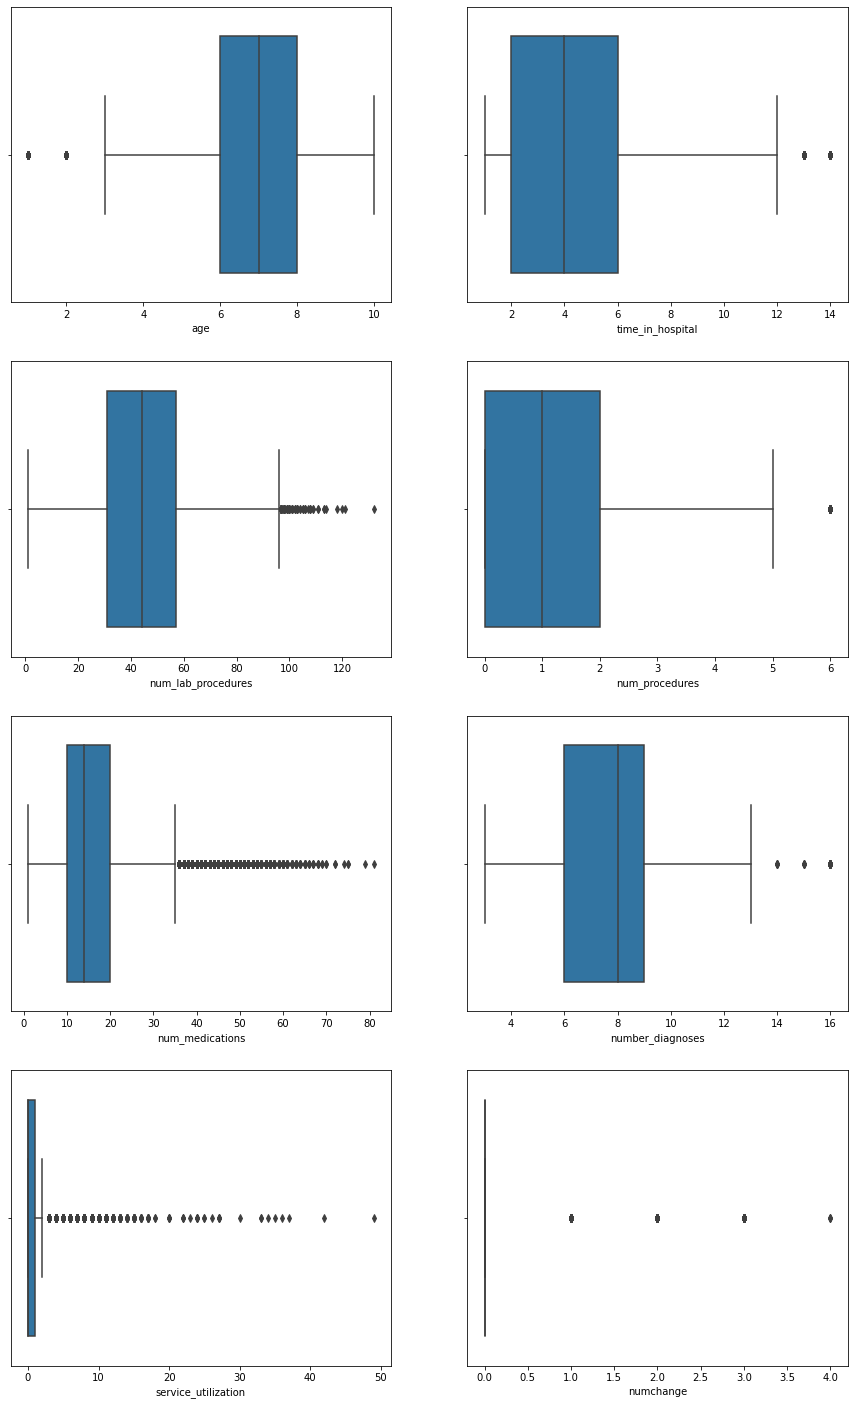

In [73]:


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,25))
for var, subplot in zip(df1_num_temp.columns, ax.flatten()):
    sns.boxplot(df1_num_temp[var], ax = subplot)
plt.show()


Only 3 features i.e., number of lab procedures, num_medications, service utilzation has significant outliers.

Hence, only those 3  features are considered while calculating the interquantile range.

In [76]:
df1_num_temp =df1_num_temp.drop(columns=['numchange','number_diagnoses','num_procedures', 'age', 'time_in_hospital'], axis=1)

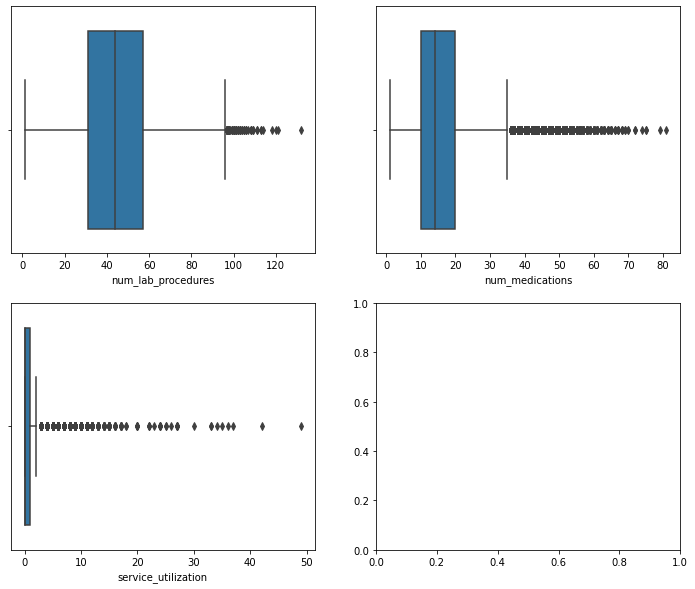

In [80]:


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, subplot in zip(df1_num_temp.columns, ax.flatten()):
    sns.boxplot(df1_num_temp[var], ax = subplot)
plt.show()

Q1 = df1_num_temp.quantile(0.25)
Q3 = df1_num_temp.quantile(0.75)
IQR = Q3 - Q1

In [81]:
df1 = df1[~((df1 < (Q1 - 1.5*IQR))|(df1 > (Q3 + 1.5*IQR))).any(axis=1)]

In [82]:
df1.readmitted.value_counts(normalize=True)

0   0.914088
1   0.085912
Name: readmitted, dtype: float64

In [ ]:
#After removing outliers, target variable is found to be imbalanced.

# Visualisation

#### Univariate Analysis

#### Distribution of Readmission

In [251]:
plt.rcParams["figure.figsize"] = [10,7]

Text(0.95, 5017, '8.59%')

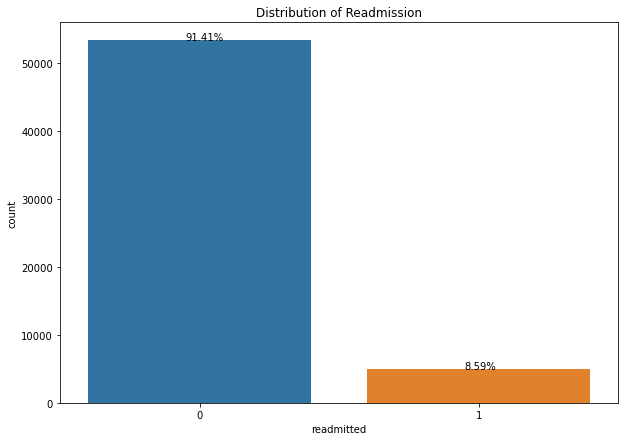

In [252]:
# Distribution of Readmission 
sns.countplot(df1['readmitted']).set_title('Distribution of Readmission')
plt.text(x = -0.05, y = df1['readmitted'].value_counts()[0] + 1, s = str(round((df1['readmitted'].value_counts()[0])*100/len(df1),2)) + '%')
plt.text(x = 0.95, y = df1['readmitted'].value_counts()[1] +1, s = str(round((df1['readmitted'].value_counts()[1])*100/len(df1),2)) + '%')

<AxesSubplot:xlabel='age', ylabel='count'>

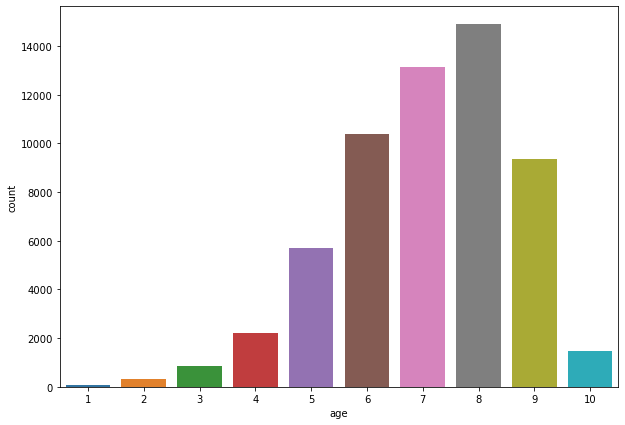

In [253]:
sns.countplot(df1['age'])

Majority of patients admitted in hospitals belongs to age group 70-80. 

In [254]:
df1['age'].skew()

-0.5640262174904831

In [255]:
df1['num_procedures'].value_counts()

0    26071
1    11847
2     7488
3     5852
6     2771
4     2432
5     1924
Name: num_procedures, dtype: int64

In [256]:
df1['num_procedures'] = df1['num_procedures'].astype(object)

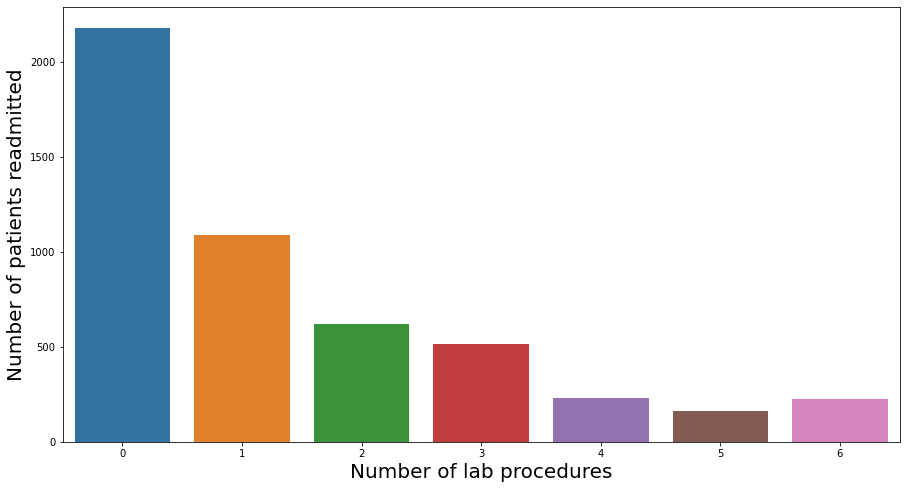

In [257]:
plt.rcParams["figure.figsize"] = [15,8]


ax = sns.countplot(data=df1, x=df1['num_procedures'][df1['readmitted']==1])

# set the label for y-axis
ax.set_ylabel('Number of patients readmitted', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Number of lab procedures', fontsize=20)

# display the plot
plt.show()



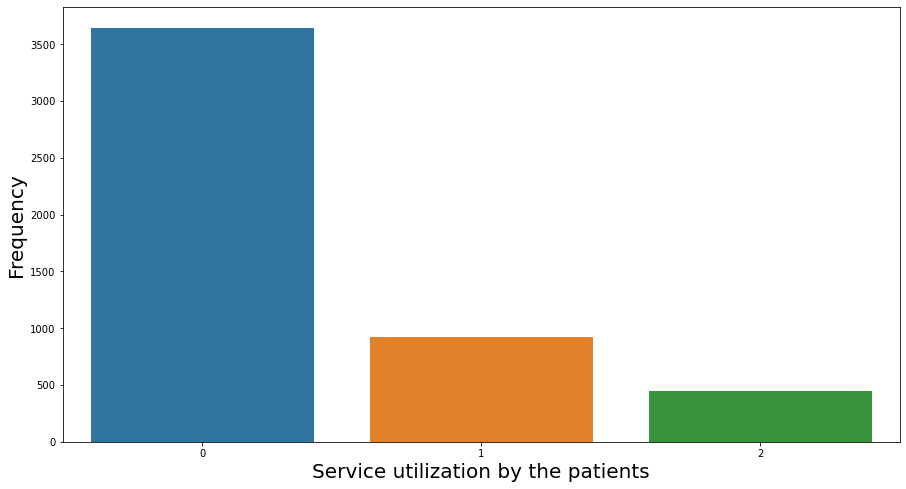

In [258]:
plt.rcParams["figure.figsize"] = [15,8]


ax = sns.countplot(data=df1, x=df1['service_utilization'][df1['readmitted']==1])

# set the label for y-axis
ax.set_ylabel('Frequency', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Service utilization by the patients', fontsize=20)

# display the plot
plt.show()

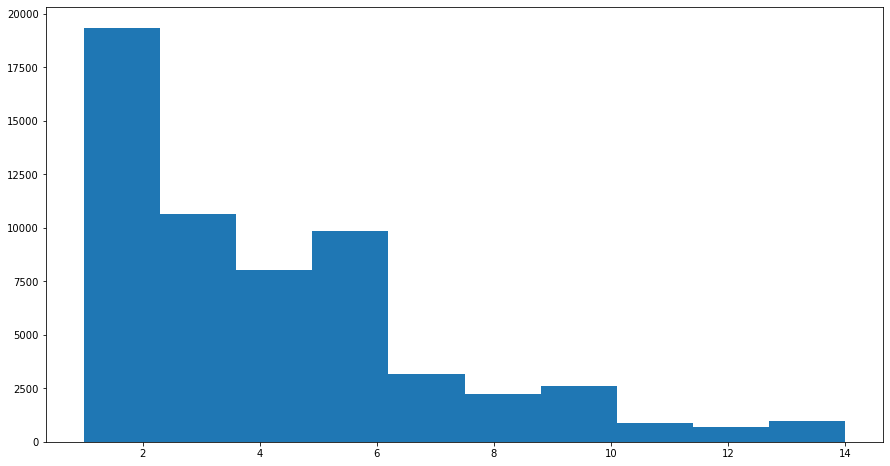

In [259]:
plt.hist(df1['time_in_hospital'], bins=10)
plt.show()

In [260]:
df1['time_in_hospital'].skew()

1.2213255132443075

Data of time spent in hospitals by the patients is highly right skewed.

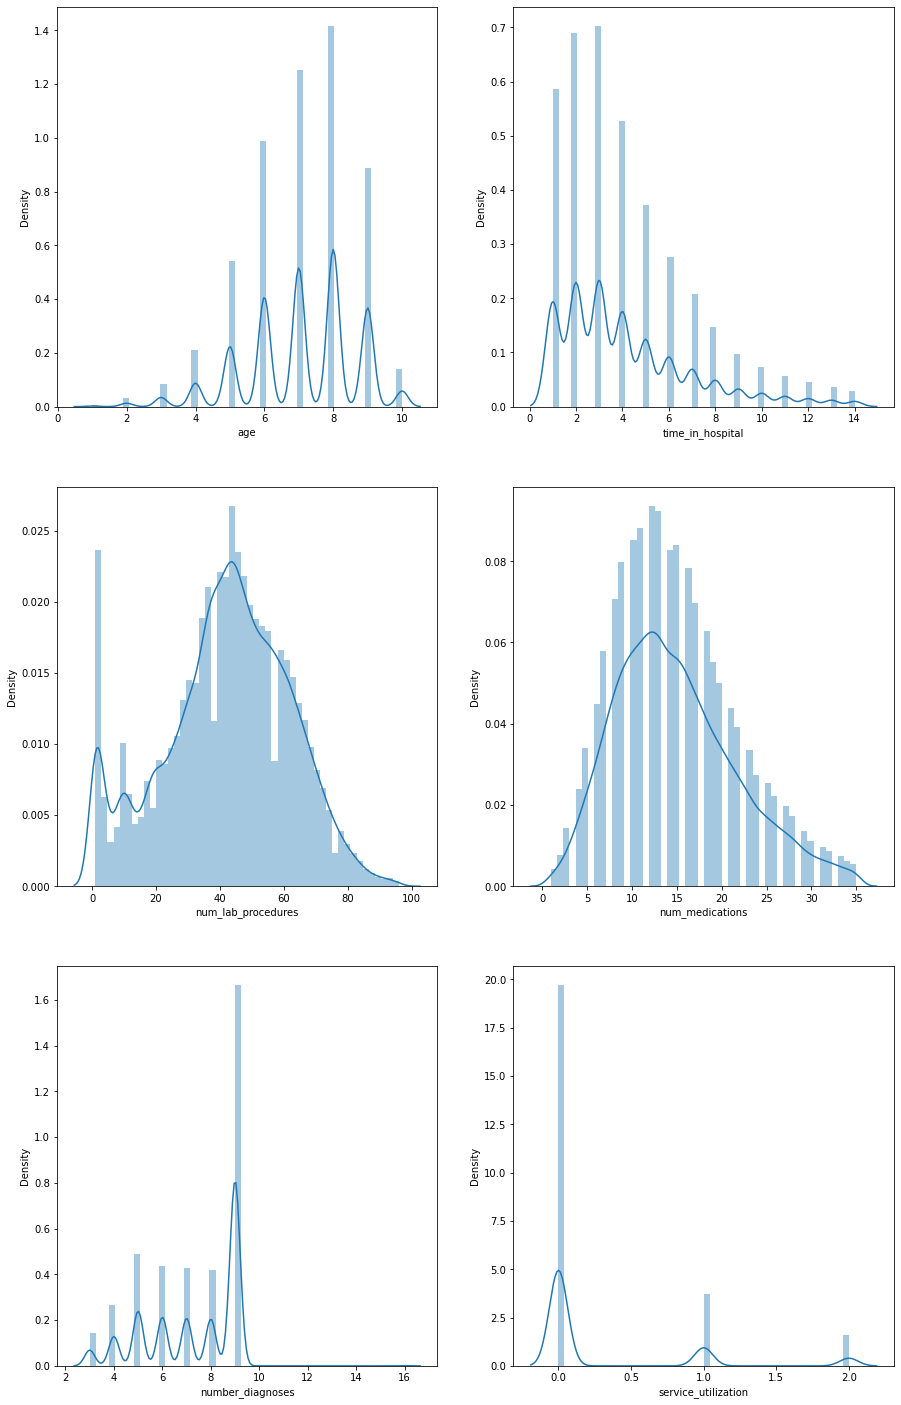

In [271]:
plt.rcParams['figure.figsize'] = [22,18]
df_n=df1.select_dtypes(include=np.number)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,25))
for var, subplot in zip(df_n.columns, ax.flatten()):
    sns.distplot(df_n[var], ax = subplot)
plt.show()


#### Time in Hospital and Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

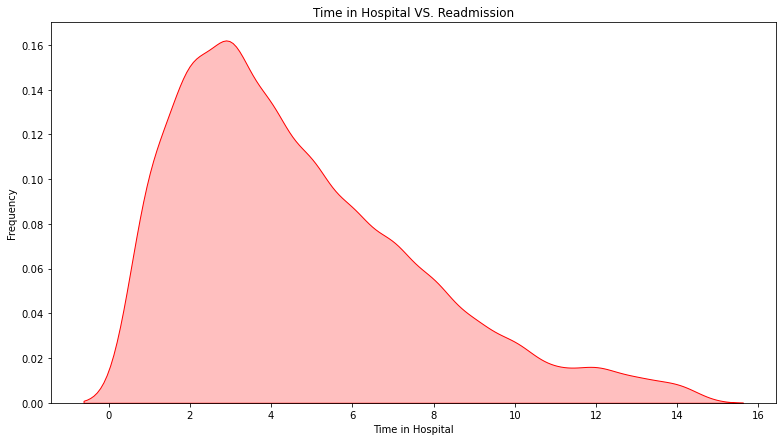

In [272]:
fig = plt.figure(figsize=(13,7),)

ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

The patients readmitted again were mostly admitted in the hospital for 3 to 4 days.

#### Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

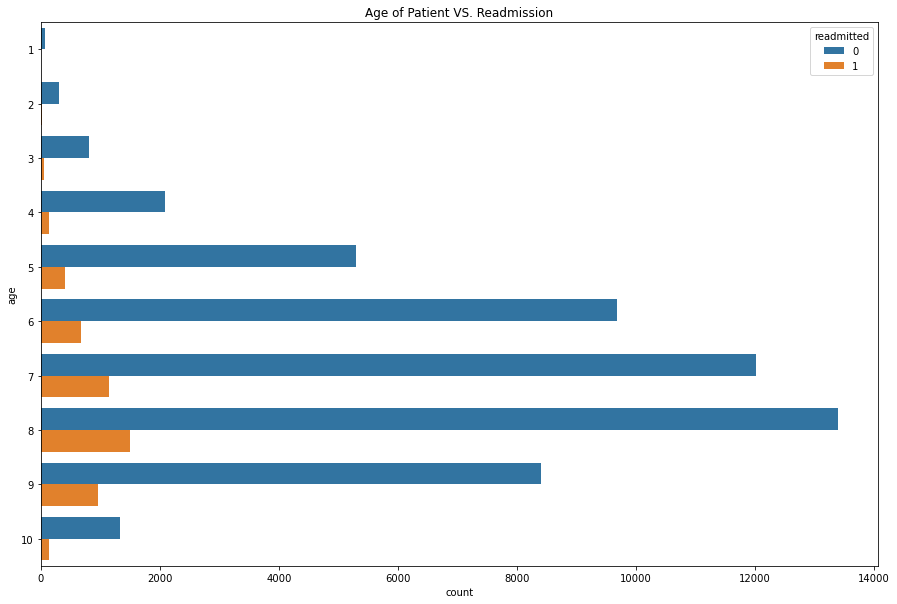

In [273]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df1['age'], hue = df1['readmitted']).set_title('Age of Patient VS. Readmission')

The maximun of patients readmitted into hospital belongs to age group of (70-80). \
The count of patients that are readmitted is very low for the patients having age less than 40.

#### Ethnicity of patient and Readmission

<AxesSubplot:xlabel='count', ylabel='race'>

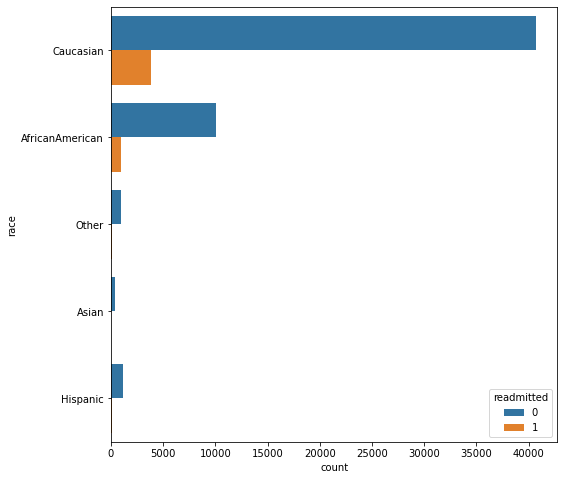

In [274]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df1['race'], hue = df1['readmitted'])

In [275]:
df1['race'][df1['readmitted']==1].value_counts(normalize = True)

Caucasian         0.772129
AfricanAmerican   0.187400
Hispanic          0.019936
Other             0.013357
Asian             0.007177
Name: race, dtype: float64

Majority of the patients readmitted into hospital belongs to the race caucasian. \
The count of patients belonging to the race Asian, Hispanic and other is negligible in comparison with patients of caucasian race.

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

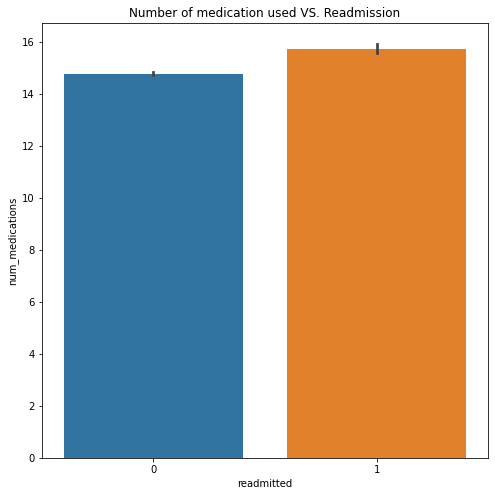

In [276]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df1['readmitted'], y = df1['num_medications']).set_title("Number of medication used VS. Readmission")

In [ ]:
fig = plt.figure(figsize=(10,7),)
ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 0),'num_medications'] , color='b',shade=True,  hue = df1['readmitted'])
ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 1),'num_medications'] , color='r',shade=True, hue = df1['readmitted'])
ax.set(xlabel='num_medications', ylabel='Frequency')
plt.title('number of generic medications VS. Readmission')

The number of medications prescribed to the patients readmitted and not readmitted are almost similar.

Hence, sevearity of patients' illness does not affect the chances of readmission into the hospital.

#### Gender and Readmission
* Male = 1
* Female = 0

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

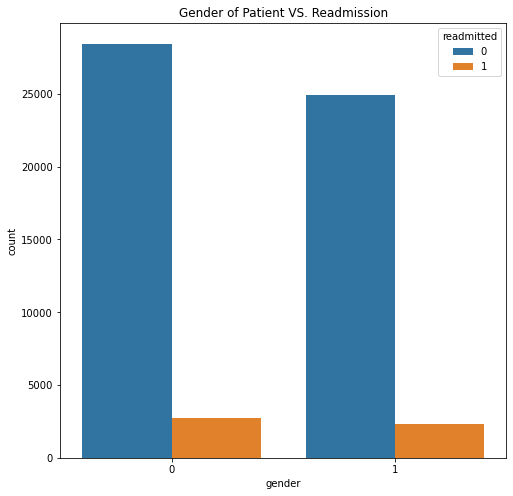

In [277]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['gender'], hue = df1['readmitted']).set_title("Gender of Patient VS. Readmission")

In [278]:
df1['gender'][df1['readmitted']==1].value_counts(normalize=True)

0   0.538278
1   0.461722
Name: gender, dtype: float64

From the graph and percentage obtained, it is found that gender feature has slight influence on the chances of readmitting into the hospital.

#### Change of Medication and Readmission
* Change = 1
* No Change = 0

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

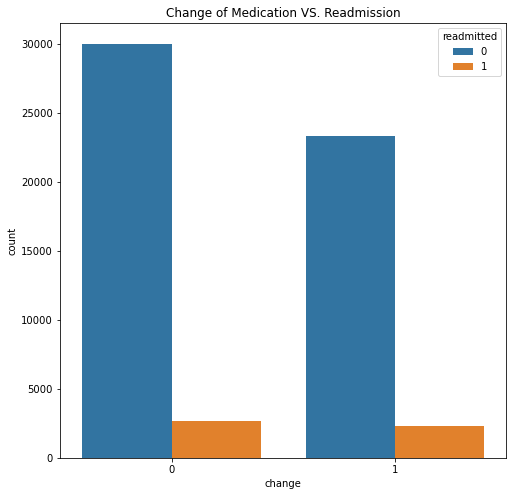

In [279]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['change'], hue = df1['readmitted']).set_title('Change of Medication VS. Readmission')

In [280]:
df1['change'].value_counts(normalize=True)

0   0.560298
1   0.439702
Name: change, dtype: float64

From the graph and percentage obtained, it is found that changing the medications reduces the chances of readmitting into the hospital slightly.

#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

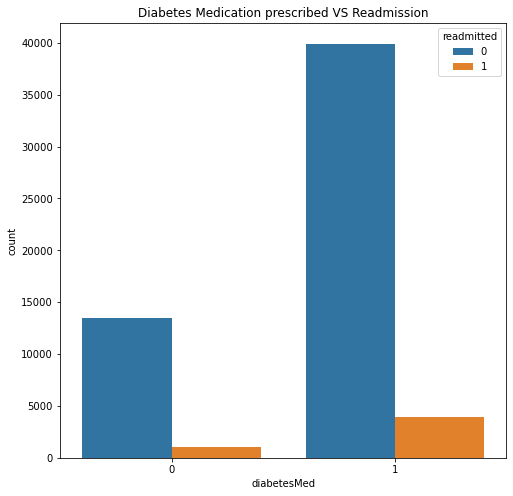

In [281]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['diabetesMed'], hue = df1['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')


In [282]:
df1['diabetesMed'][df1['readmitted']==1].value_counts()

1    3980
0    1036
Name: diabetesMed, dtype: int64

Odds of readmitted patients having diabetic medicine prescription are found to be higher.

#### Service Utilization and Readmission

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

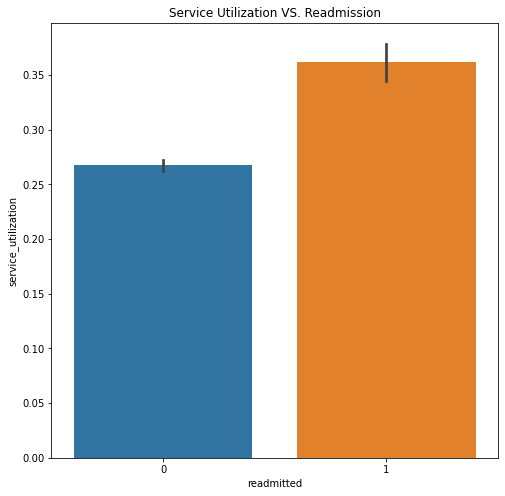

In [283]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df1['service_utilization'], x = df1['readmitted']).set_title('Service Utilization VS. Readmission')


These patients who have utilised the medical facilities provided by hospitals are highly suceptible for readmittance in hospitals. 

#### Glucose serum test result and Readmission
*Glucose Serum test* - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

* '>200 and >300 : 1 = indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : 2 = test was not taken

In [284]:
df1['max_glu_serum'][df1['readmitted']==1].value_counts()

2    4746
1     138
0     132
Name: max_glu_serum, dtype: int64

No significant effect of glucose serum test result is observed on readmission of patients in hospitals.

#### A1C result and Readmission


*A1C test* - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.
*  '>7'   :  1   
*  '>8'   :  1   
*    Norm :  0  = Normal 
*    None : 2 = Test was not taken

In [285]:
df1['A1Cresult'][df1['readmitted']==1].value_counts()

2    4142
1     596
0     278
Name: A1Cresult, dtype: int64

A1C test shows considerable significant effect on hospital readmittance of patients.

Hence, in comparison with glucose serum test, A1C test is more likely to be the reliable test to predict the chances of readmittance of diabetic patients in hospital.

# Feature Transformation

In [98]:
df2=df1.copy()

In [99]:
df2.dtypes

race                        object
gender                      object
age                          int64
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
service_utilization          int64
numchange                    int64
dtype: object

In [100]:
#Separating target variable 
df_target= df2['readmitted']


In [101]:
df3 = df2.drop(['readmitted'] , axis =1)


In [102]:
df3.shape

(58385, 18)

In [103]:
df_cat = df3.select_dtypes(include=[object])
df_num = df3.select_dtypes(include=[np.number])

In [104]:
df_cat.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed'],
      dtype='object')

In [105]:
df_num.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

In [106]:
df_cat.shape

(58385, 10)

In [107]:
df_num.shape

(58385, 8)

In [108]:
num_col = list(df_num.columns)
num_col

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'service_utilization',
 'numchange']

Checking skewness and kurtosis of numerical columns


The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

In [109]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df_num[i].skew()
    skew_before.append(skewval)
    
    kurtval = df_num[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df_num[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) or (abs(kurtval) >7):
        log_transform_needed.append('Yes')
        log_type.append('log1p')
        
        df_num[i + "_log1p"] = np.log1p(df_num[i])
        
        skewvalnew = df_num[i + "_log1p"].skew()
        skew_after.append(skewvalnew)
        
        kurtvalnew = df_num[i + "_log1p"].kurtosis()
        kurt_after.append(kurtvalnew)
        
        sdvalnew = df_num[i + "_log1p"].std()
        standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [110]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.564026,0.159573,1.561789,No,NA,-0.564026,0.159573,1.561789
1,time_in_hospital,1.221326,1.231748,2.833385,No,NA,1.221326,1.231748,2.833385
2,num_lab_procedures,-0.237799,-0.368701,19.684756,No,NA,-0.237799,-0.368701,19.684756
3,num_procedures,1.260290,0.707490,1.709638,No,NA,1.260290,0.707490,1.709638
4,num_medications,0.585299,-0.028328,6.794054,No,NA,0.585299,-0.028328,6.794054
5,number_diagnoses,-0.603767,-0.712123,1.911510,No,NA,-0.603767,-0.712123,1.911510
6,service_utilization,1.957346,2.689529,0.570770,No,NA,1.957346,2.689529,0.570770
7,numchange,1.671778,2.333648,0.468321,No,NA,1.671778,2.333648,0.468321


None of the numerical feature needed log transformation since the skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7.

In [111]:
df_cat.shape

(58385, 10)

In [112]:
df_num.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

#### Standardising numerical variables

In [115]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
for i in df_num.columns:
    df_num[i] = standard_scale.fit_transform(df_num[[i]])

In [116]:
df_num.shape

(58385, 8)

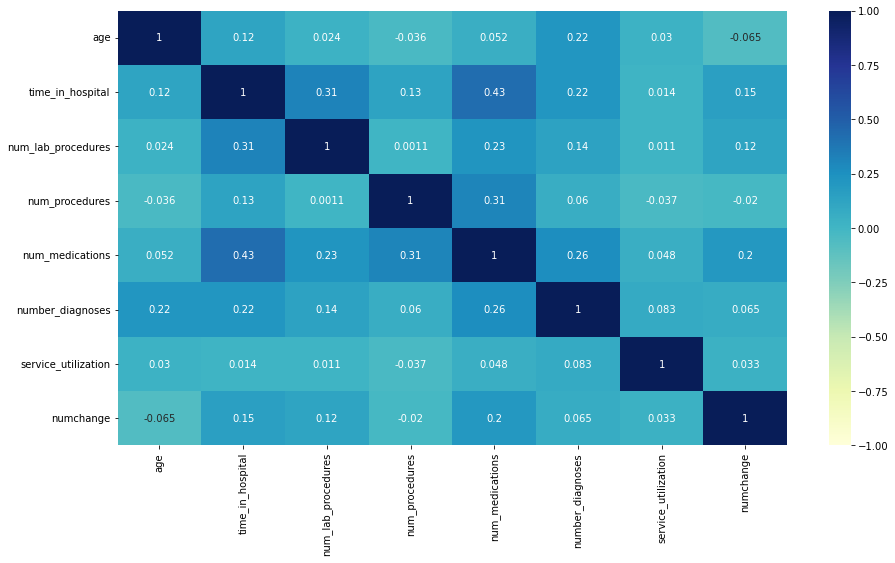

In [117]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(df_num.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

Number of medications and time spent in hospital are found to be correlated slightly.

In [118]:
df_pd = pd.get_dummies(data = df_cat, drop_first = True)

In [119]:
df_pd.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_25,admission_source_id_2,admission_source_id_4,admission_source_id_6,admission_source_id_7,admission_source_id_17,diag_1_1.0,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,max_glu_serum_1,max_glu_serum_2,A1Cresult_1,A1Cresult_2,change_1,diabetesMed_1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1
5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
6,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1


#### Concatenate numerical and  categorical variables

In [298]:
X = pd.concat([df_num, df_pd], axis = 1)

In [300]:
X = X.reset_index()

In [301]:
X.drop('index', inplace=True, axis=1)

In [302]:
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization,numchange,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_25,admission_source_id_2,admission_source_id_4,admission_source_id_6,admission_source_id_7,admission_source_id_17,diag_1_1.0,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,max_glu_serum_1,max_glu_serum_2,A1Cresult_1,A1Cresult_2,change_1,diabetesMed_1
0,-3.247205,-0.407258,0.855654,-0.805009,0.461061,0.910723,-0.482593,1.600318,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1,-1.966612,-0.760196,0.093637,-0.220084,0.166684,-0.135579,-0.482593,1.600318,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
2,-1.326315,-1.113134,0.449245,-0.805009,-1.010827,-1.181881,-0.482593,-0.534988,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1
3,-0.686018,-0.407258,-0.566779,2.704537,0.166684,0.910723,-0.482593,-0.534988,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
4,-0.045721,-0.054320,1.414467,-0.220084,0.902628,-0.135579,-0.482593,-0.534988,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1


Checking null values before moving ahead for modelling

In [303]:
Total = X.isnull().sum().sort_values(ascending=False)
Total

age                            0
diag_1_4.0                     0
admission_source_id_2          0
admission_source_id_4          0
admission_source_id_6          0
admission_source_id_7          0
admission_source_id_17         0
diag_1_1.0                     0
diag_1_2.0                     0
diag_1_3.0                     0
diag_1_5.0                     0
discharge_disposition_id_22    0
diag_1_6.0                     0
diag_1_7.0                     0
diag_1_8.0                     0
max_glu_serum_1                0
max_glu_serum_2                0
A1Cresult_1                    0
A1Cresult_2                    0
change_1                       0
discharge_disposition_id_25    0
discharge_disposition_id_18    0
time_in_hospital               0
race_Hispanic                  0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_diagnoses               0
service_utilization            0
numchange                      0
race_Asian

In [304]:
df_target = df_target.astype(int)

In [305]:
df_target.value_counts(normalize=True)

0   0.914088
1   0.085912
Name: readmitted, dtype: float64

In [306]:
y = df_target

# SMOTE TO REDUCE IMBALANCE IN DATASET

In [127]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [309]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 53369, 1: 5016})
Counter({0: 53369, 1: 53369})


In [310]:
X.shape

(106738, 43)

In [311]:
y.shape

(106738,)

# Logistic Regression Full Model

Importing libraries and performing train test split

In [312]:
import statsmodels
import statsmodels.api as sm
X = sm.add_constant(X)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (85390, 44)
y_train_full (85390,)
X_test_full (21348, 44)
y_test_full (21348,)


In [132]:
# build the model on train data (X_train and y_train)
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.312839
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                85390
Model:                          Logit   Df Residuals:                    85345
Method:                           MLE   Df Model:                           44
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.5487
Time:                        09:15:08   Log-Likelihood:                -26713.
converged:                       True   LL-Null:                       -59188.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.5224      0.093     80.459      0.000   

In [ ]:
#Pseudo R2 value of full model is found to be 0.5487.
#LLR p-value less than 0.05 indicate that model is significant.
#Significant difference between log likelyhood of null model and full model is observed.
#It also indicates scope for the further improvement in base model.
#Surprisingly, majority of the features are found to be significant.

In [134]:
logreg_full.llr_pvalue

0.0

the LLR-p-value is less than 0.05 Hence the overall model is significant.

In [133]:
# Mcfadden R2 1- llf/llr
mcf_r2=1-(logreg_full.llf/logreg_full.llnull)    # both values from model.summary()
mcf_r2

0.5486689985350994

In [135]:
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds'])
df_odds.sort_values('Odds' , ascending=False)

,Odds
const,1848.984773
numchange,1.508199
age,1.464584
discharge_disposition_id_22,1.407422
num_medications,1.309774
service_utilization,1.171192
number_diagnoses,1.138833
num_procedures,1.136309
time_in_hospital,1.042857
diabetesMed_1,1.000095


In [ ]:
# Odds of feature numchange (which represent count of changes in prescribed medications) are highest followed by age.
# After the 'Age' feature, 'discharge_disposition_id_22' is found to be more significant. 
# It corresponds to a category of patient who were discharged to home after certain period of follow-up care provided by hospital.

Model Evaluation Metrics (Train Dataset)

In [137]:
print('AIC:', logreg_full.aic)

AIC: 53516.60532974009


In [138]:
y_pred_prob = logreg_full.predict(X_train_full)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
table_full_train = classification_report(y_train_full, y_pred)

# print the table
print(table_full_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_full, y_pred)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     42677
           1       0.89      0.86      0.88     42713

    accuracy                           0.88     85390
   macro avg       0.88      0.88      0.88     85390
weighted avg       0.88      0.88      0.88     85390

kappa value: 0.7619425482376132


In [144]:
from sklearn.metrics import roc_auc_score

In [145]:
print('AUC Score for train dataset:', round(roc_auc_score(y_train_full, y_pred_prob),4))

AUC Score for train dataset: 0.9354


Model Performance Metrics (Test Dataset)

In [147]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred)
print('kappa value:',kappa)

kappa value: 0.7564033775529615


In [148]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
from IPython.display import Image  

import random

In [149]:
table_full = classification_report(y_test_full, y_pred)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10692
           1       0.89      0.86      0.88     10656

    accuracy                           0.88     21348
   macro avg       0.88      0.88      0.88     21348
weighted avg       0.88      0.88      0.88     21348



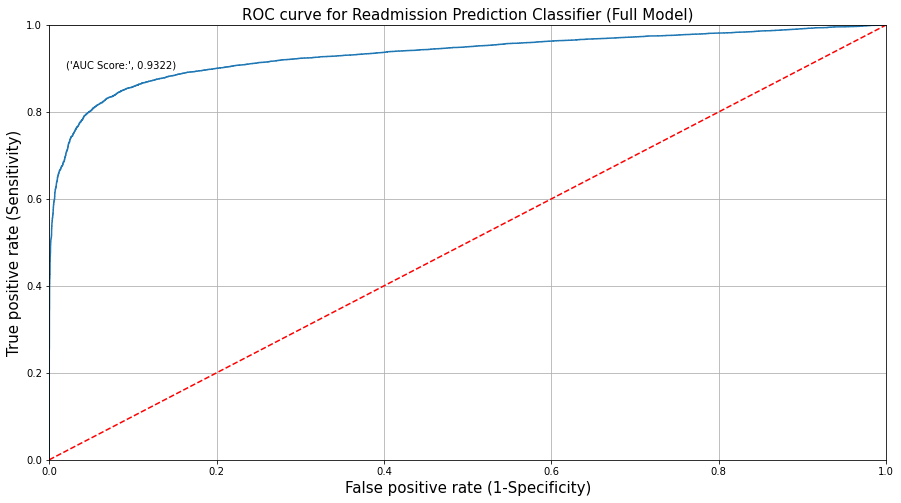

In [151]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Readmission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_pred_prob),4)))
                        
plt.grid(True)

Optimization of Threshold value

Identifying best cut-off by yoden's index

In [152]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head(10)

,TPR,FPR,Threshold,Difference
0,0.848348,0.085859,0.550911,0.762490
1,0.848067,0.085578,0.551652,0.762489
2,0.848442,0.086046,0.550317,0.762397
3,0.844313,0.081930,0.563499,0.762383
4,0.843938,0.081556,0.564888,0.762381
5,0.848724,0.086420,0.549799,0.762304
6,0.848348,0.086046,0.550401,0.762303
7,0.845158,0.082866,0.560143,0.762292
8,0.845064,0.082772,0.560311,0.762292
9,0.844125,0.081837,0.563704,0.762288


In [153]:
y_pred_youden = [ 0 if x < 0.550911 else 1 for x in y_pred_prob]

In [157]:
y_pred_prob = logreg_full.predict(X_train_full)
y_pred_youden = [ 0 if x < 0.550911 else 1 for x in y_pred_prob]
table_full_train_youden = classification_report(y_train_full, y_pred_youden)

# print the table
print(table_full_train_youden)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_full, y_pred_youden)
print('kappa value:',kappa)

print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_full, y_pred_prob),4))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     42677
           1       0.91      0.85      0.88     42713

    accuracy                           0.88     85390
   macro avg       0.88      0.88      0.88     85390
weighted avg       0.88      0.88      0.88     85390

kappa value: 0.7658804198568602
AUC Score for train dataset: 0.9354


Using Youden's Index for test dataset

In [158]:
from sklearn.metrics import cohen_kappa_score
y_pred_prob_test = logreg_full.predict(X_test_full)
y_pred_youden_test = [ 0 if x < 0.550911 else 1 for x in y_pred_prob_test]
kappa = cohen_kappa_score(y_test_full, y_pred_youden_test)
print('kappa value:',kappa)

kappa value: 0.7624801211572508


In [ ]:
# Minor increment in cohen kappa score is observed after implementing optimum threashold value.

# Logistic regression RFE Model (Recurssive Feature elimination)

In [160]:
y_train_rfe = y_train_full
y_test_rfe = y_test_full

In [161]:
#For RFE, we have to exclude constant feature from the full model.
X_train_rfe = X_train_full.iloc[:,1:]
X_test_rfe = X_train_full.iloc[:,1:]

logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select=10)

rfe_model = rfe_model.fit(X_train_rfe, y_train_rfe)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)


signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['index', 'age', 'time_in_hospital', 'num_medications',
       'number_diagnoses', 'service_utilization', 'gender_1',
       'admission_source_id_7', 'diag_1_1.0', 'change_1'],
      dtype='object')


In [163]:
logreg_rfe = sm.Logit(y_train_rfe, X_train_full[['age', 'time_in_hospital', 'num_medications',
       'number_diagnoses', 'service_utilization', 'gender_1',
       'admission_source_id_7', 'diag_1_1.0', 'change_1']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.645333
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                85390
Model:                          Logit   Df Residuals:                    85381
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 0.06898
Time:                        10:13:19   Log-Likelihood:                -55105.
converged:                       True   LL-Null:                       -59188.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.2028      0.008     24.486      0.000       0.187       0.

In [ ]:
# Pseudo R2 value of model is dropped drastically after selecting RFE features.

In [165]:
y_pred_prob_t = logreg_rfe.predict(X_train_full[['age', 'time_in_hospital', 'num_medications',
       'number_diagnoses', 'service_utilization', 'gender_1',
       'admission_source_id_7', 'diag_1_1.0', 'change_1']])
y_pred_t = [ 0 if x < 0.5 else 1 for x in y_pred_prob_t]
table_rfe_train = classification_report(y_train_rfe, y_pred_t)

# print the table
print(table_rfe_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_rfe, y_pred_t)
print('kappa value:',kappa)

print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_rfe, y_pred_prob_t),4))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68     42677
           1       0.71      0.37      0.49     42713

    accuracy                           0.61     85390
   macro avg       0.64      0.61      0.58     85390
weighted avg       0.64      0.61      0.58     85390

kappa value: 0.2161776851121603
AUC Score for train dataset: 0.7139


In [166]:
y_pred_prob = logreg_rfe.predict(X_test_full[['age', 'time_in_hospital', 'num_medications',
       'number_diagnoses', 'service_utilization', 'gender_1',
       'admission_source_id_7', 'diag_1_1.0', 'change_1']])
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# create a confusion matrix
cm = confusion_matrix(y_test_full, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6020236087689713


In [167]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred)
print('kappa value:',kappa)

kappa value: 0.20339253187613848


In [168]:
table_full = classification_report(y_test_full, y_pred)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.57      0.85      0.68     10692
           1       0.70      0.36      0.47     10656

    accuracy                           0.60     21348
   macro avg       0.63      0.60      0.58     21348
weighted avg       0.63      0.60      0.58     21348



In [ ]:
# The model built by RFE features is found to be performing very poorly.

# Decision Tree full model (Gini)

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (85390, 44)
y_train (85390,)
X_test (21348, 44)
y_test (21348,)


In [176]:
decision_tree_full = DecisionTreeClassifier(random_state=10)
decision_tree_full = decision_tree_full.fit(X_train, y_train)
y_pred_decision_tree_full_train = decision_tree_full.predict(X_train)

table_dct_train = classification_report(y_train, y_pred_decision_tree_full_train)

# print the table
print(table_dct_train)

kappa = cohen_kappa_score(y_train, y_pred_decision_tree_full_train)
print('kappa value for train dataset:',kappa)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42677
           1       1.00      1.00      1.00     42713

    accuracy                           1.00     85390
   macro avg       1.00      1.00      1.00     85390
weighted avg       1.00      1.00      1.00     85390

kappa value for train dataset: 1.0


In [177]:

decision_tree_full = DecisionTreeClassifier(random_state=10)
decision_tree_full = decision_tree_full.fit(X_train, y_train)
y_pred_decision_tree_full = decision_tree_full.predict(X_test)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
5,num_procedures,0.361404
8,service_utilization,0.254160
3,time_in_hospital,0.097151
1,index,0.052529
9,numchange,0.034314
2,age,0.032599
4,num_lab_procedures,0.029471
6,num_medications,0.025396
7,number_diagnoses,0.019632
14,gender_1,0.010084


In [179]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9027543563799888


In [180]:
table_full = classification_report(y_test, y_pred_decision_tree_full)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     10692
           1       0.90      0.91      0.90     10656

    accuracy                           0.90     21348
   macro avg       0.90      0.90      0.90     21348
weighted avg       0.90      0.90      0.90     21348



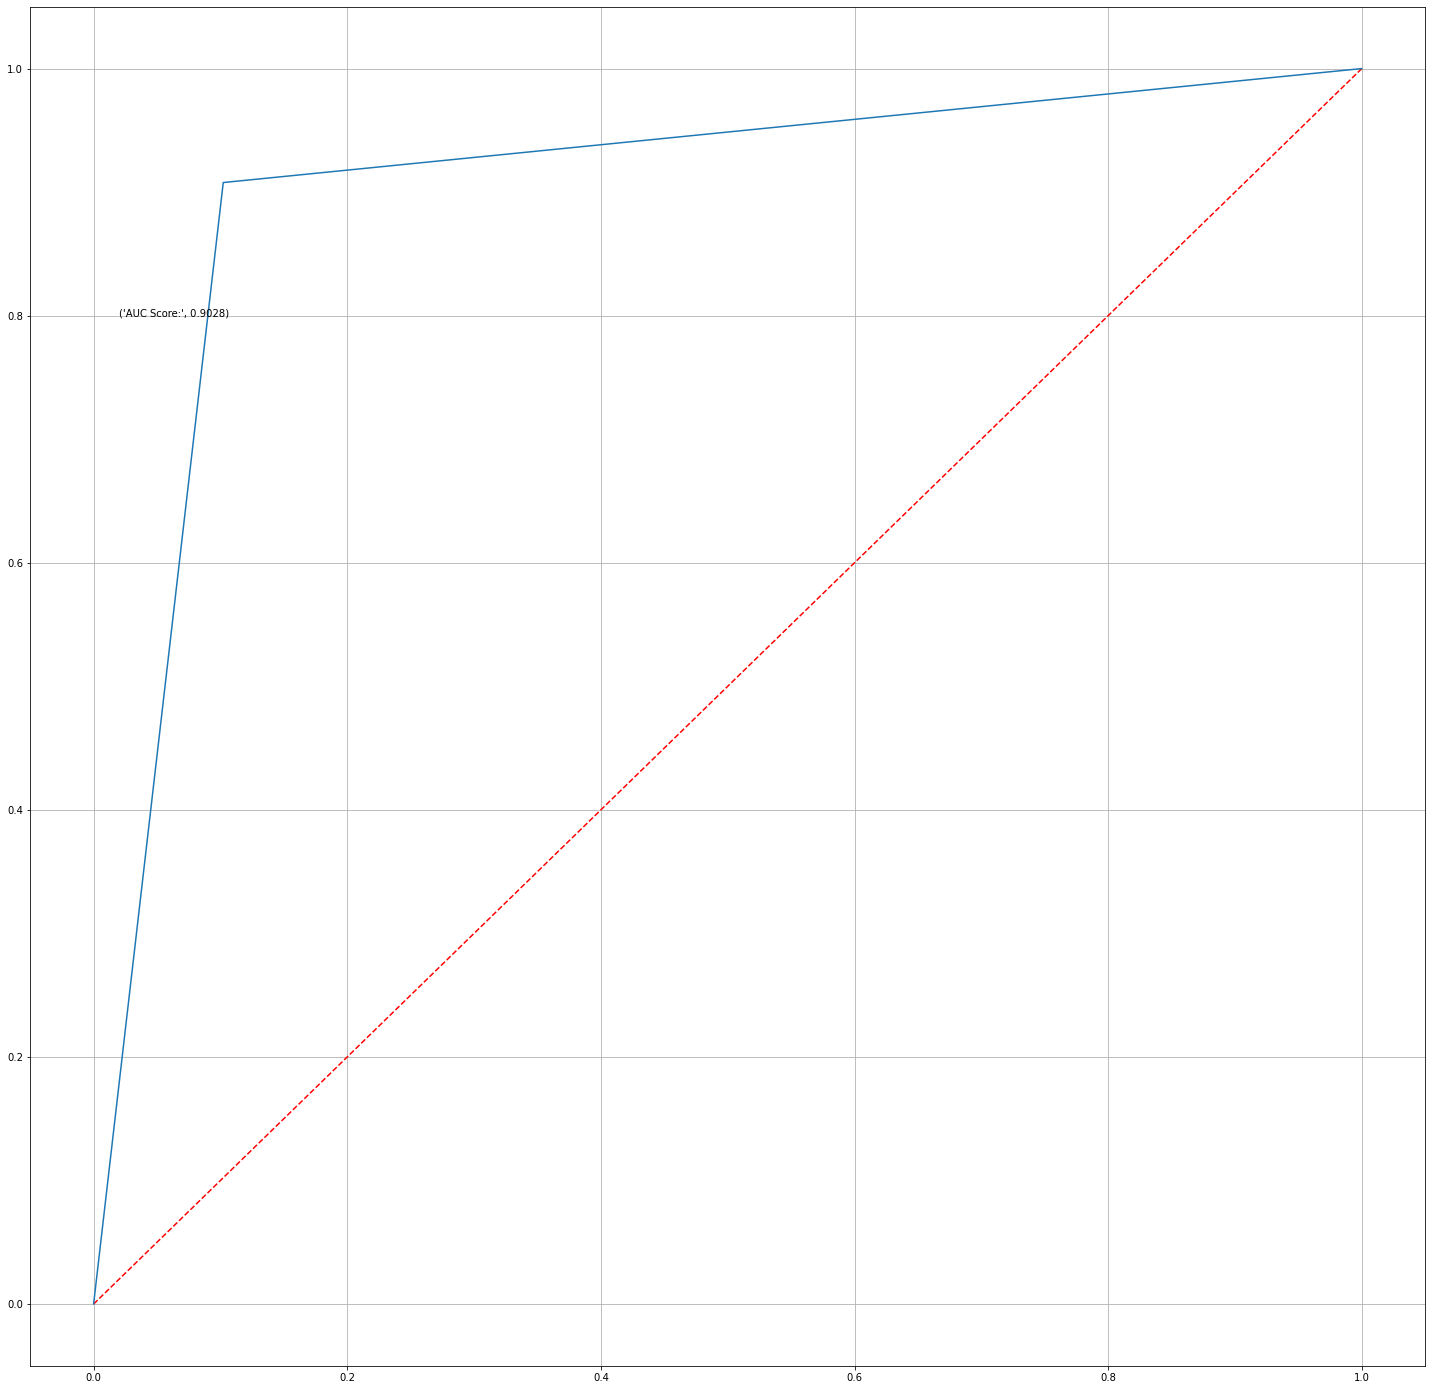

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree_full)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_decision_tree_full),4)))
                            
plt.grid(True)

In [182]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full)
print('kappa value:',kappa)

kappa value: 0.805511539590513


In [183]:
%pip install pydotplus
import pydotplus
from IPython.display import Image  

import random

Note: you may need to restart the kernel to use updated packages.


In [184]:
import sys
!{sys.executable} -m pip install pydotplus

In [185]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [186]:
conda install graphviz

^C

Note: you may need to restart the kernel to use updated packages.


In [ ]:
decision_tree_classification = DecisionTreeClassifier(max_leaf_nodes = 20)

dt_model = decision_tree_classification.fit(X_train, y_train)

labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["No","Yes"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [187]:
decision_tree_model = DecisionTreeClassifier()

scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'accuracy')

print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Mean accuracy after 10 fold cross validation:  0.9


# Decision Tree full model (Entropy criteria)

In [188]:
decision_tree_full_ent = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
decision_tree_full_ent = decision_tree_full_ent.fit(X_train, y_train)
y_pred_decision_tree_full_ent = decision_tree_full_ent.predict(X_test)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full_ent.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
3,time_in_hospital,0.392035
8,service_utilization,0.238973
1,index,0.068901
5,num_procedures,0.042054
4,num_lab_procedures,0.041712
6,num_medications,0.033565
2,age,0.030902
7,number_diagnoses,0.028695
9,numchange,0.024607
14,gender_1,0.006344


In [189]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full_ent)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9048622821810005


In [190]:
table_full_ent = classification_report(y_test, y_pred_decision_tree_full_ent)

# print the table
print(table_full_ent)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     10692
           1       0.90      0.91      0.91     10656

    accuracy                           0.90     21348
   macro avg       0.90      0.90      0.90     21348
weighted avg       0.90      0.90      0.90     21348



No significant difference in performance is observed between the use case of gini criteria and entropy criteria.

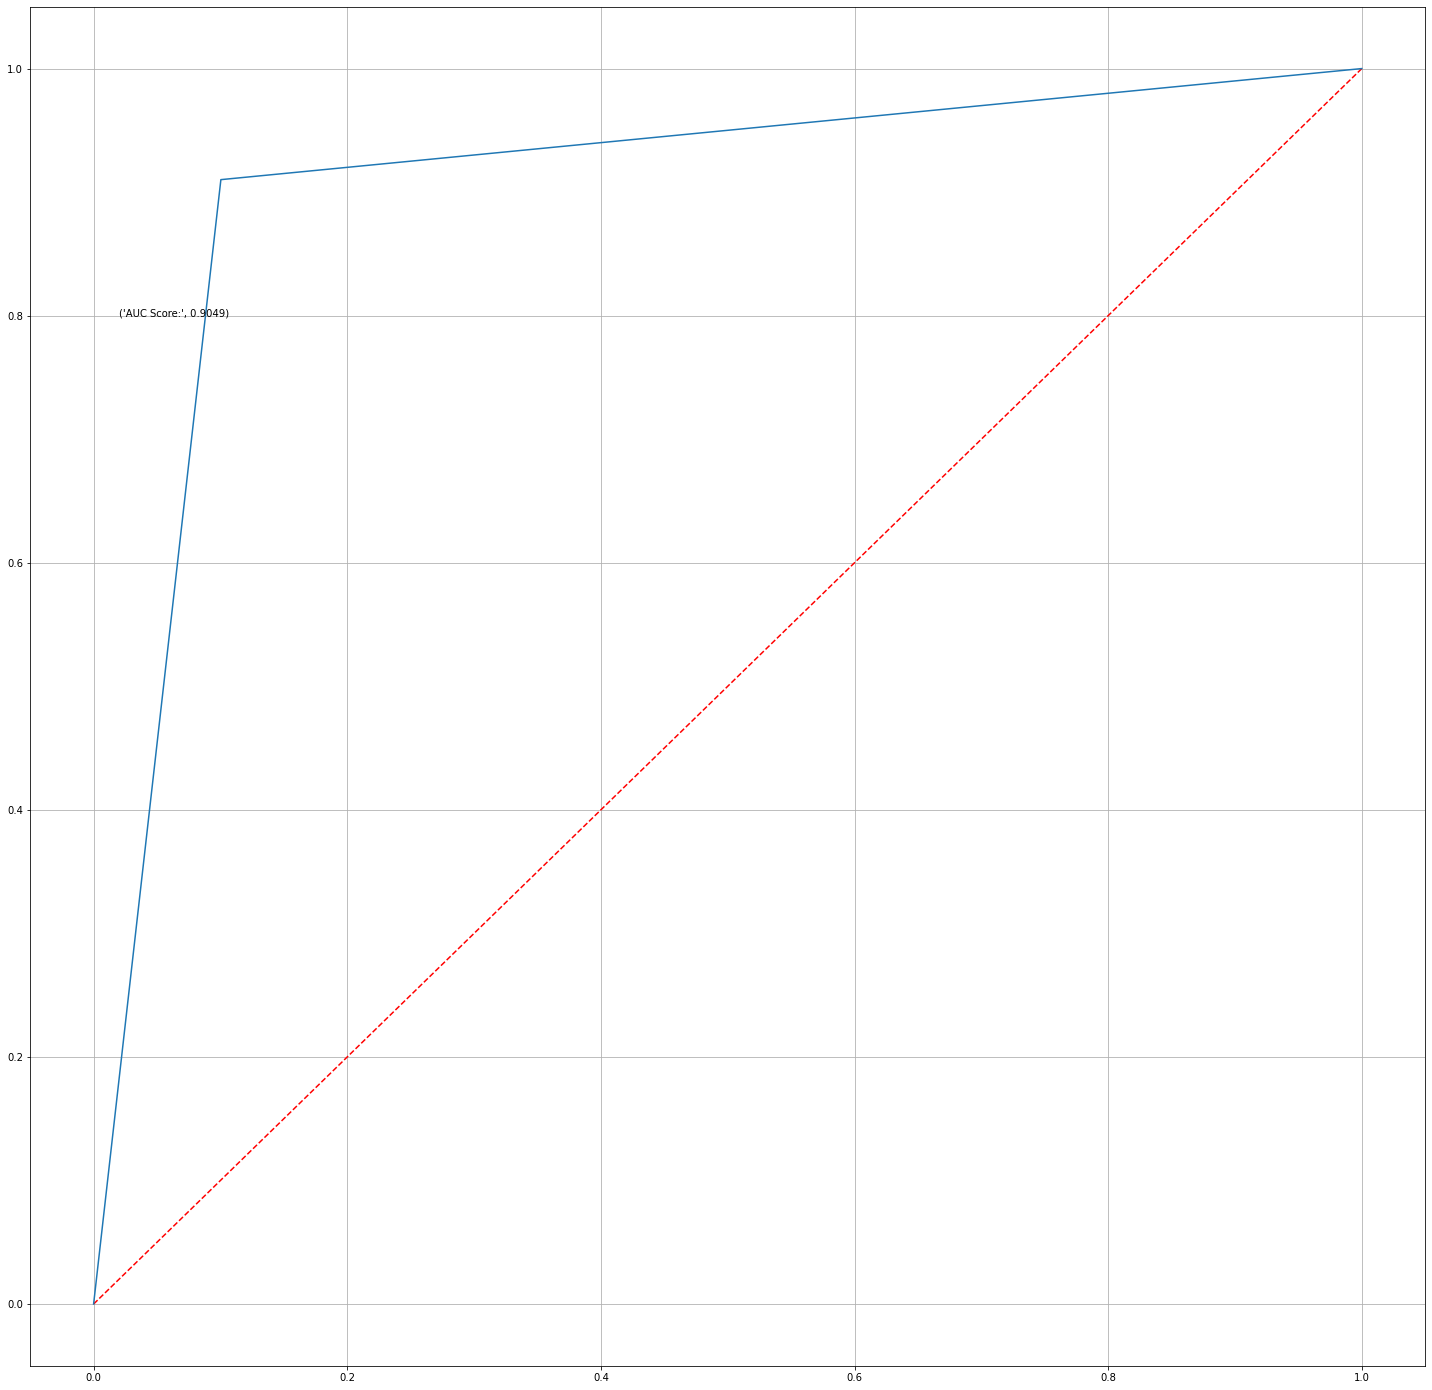

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree_full_ent)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_decision_tree_full_ent),4)))
                            
plt.grid(True)

In [192]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full_ent)
print('kappa value:',kappa)

kappa value: 0.8097274802169239


Kohen Kappa score for DT with entropy criteria is slightly better than that observed during DT with gini criteria.

Overall, no significant difference in performance is observed between the use case of gini criteria and entropy criteria.

In [196]:
scores = cross_val_score(estimator = decision_tree_full_ent, 
                         X = X, 
                         y = y, 
                         cv = 10, 
                         scoring = 'accuracy')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
print("accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

accuracy after 10 fold cross validation:  0.62


Since, the accuracy of decision tree on train dataset was 100% and the accuracy after 10 fold cross validation is 0.62,
it can be concluded that the decision tree model is overfitted.
To reduce the variance, we should try random forest algorithm.

# Random Forest

Performance of random forest algorithm on train dataset

In [198]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_train)

print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     42677
           1       1.00      0.98      0.99     42713

    accuracy                           0.99     85390
   macro avg       0.99      0.99      0.99     85390
weighted avg       0.99      0.99      0.99     85390



Performance of random forest algorithm on test dataset

In [200]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10692
           1       0.99      0.89      0.94     10656

    accuracy                           0.94     21348
   macro avg       0.95      0.94      0.94     21348
weighted avg       0.95      0.94      0.94     21348



Accuracy of Random forest on train dataset : 0.99

Accuracy of Random forest on test dataset : 0.94

Hence, random forest model is less overfitted compared to the decision tree.

In [204]:
scores = cross_val_score(estimator = rf_classification, 
                         X = X, 
                         y = y, 
                         cv = 10, 
                         scoring = 'accuracy')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
print("accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

accuracy after 10 fold cross validation:  0.86


Cross validation score of Random forest algorithm is significantly high as compared to that of dcision tree.

In [202]:
kappa = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value:',kappa)

kappa value: 0.8839977018672013


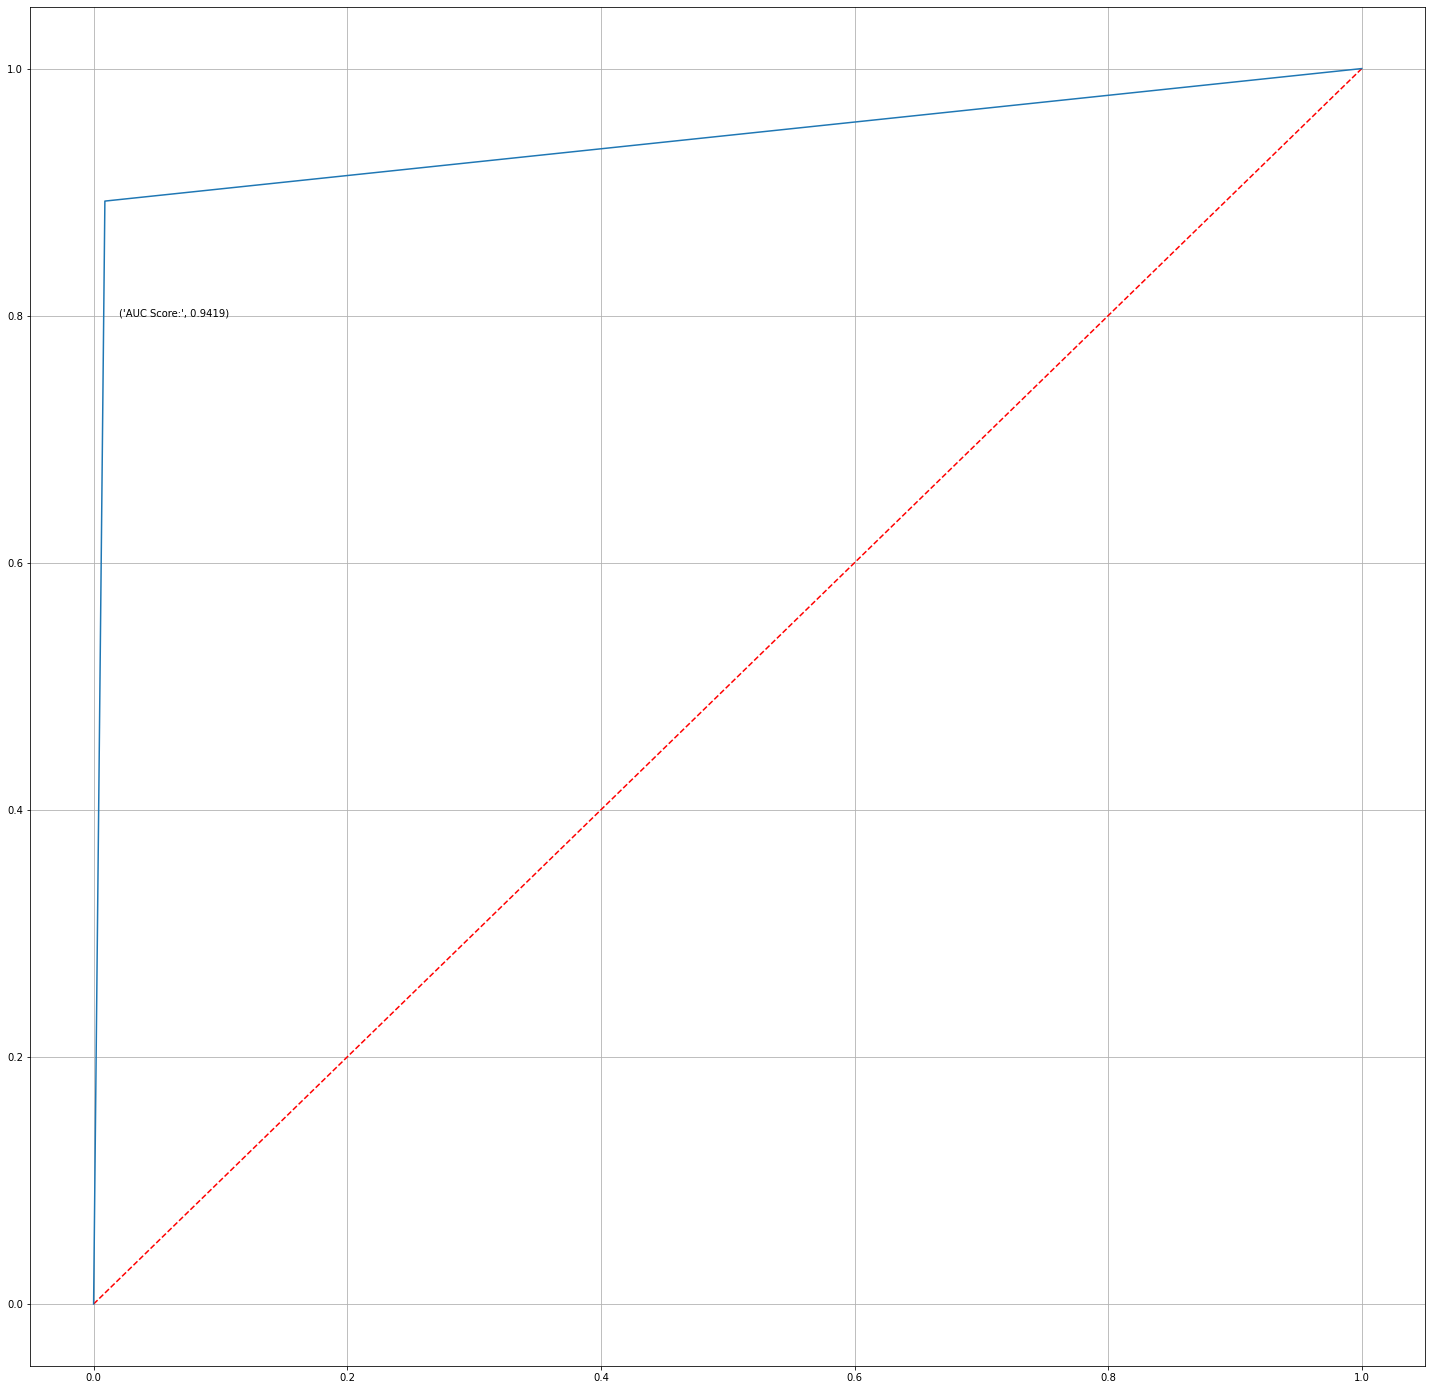

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf),4)))
                            
plt.grid(True)

# Random Forest Tuned Parameters

In [205]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 4
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 4)

# use fit() to fit the model on the train set
rf_model_tuned = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model_tuned.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150} 



In [308]:
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model_tuned.best_params_['criterion'], 
                                                   max_depth = rf_model_tuned.best_params_['max_depth'], 
                                                   min_samples_split = rf_model_tuned.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model_tuned.best_params_['n_estimators'],
                                                   random_state = 10)


scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X, 
                         y = y, 
                         cv = 5, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 5 fold cross validation
print("Mean ROC-AUC score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 5 fold cross validation:  0.6


In [208]:
random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, 
                                                   min_samples_split = 2, n_estimators = 150,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

y_pred_rf_tuned = random_forest_tuned_model.predict(X_test)

print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10692
           1       0.99      0.90      0.94     10656

    accuracy                           0.94     21348
   macro avg       0.95      0.94      0.94     21348
weighted avg       0.95      0.94      0.94     21348



In [209]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9449597151958029


In [210]:
kappa = cohen_kappa_score(y_test, y_pred_rf_tuned)
print('kappa value:',kappa)

kappa value: 0.8899016363498176


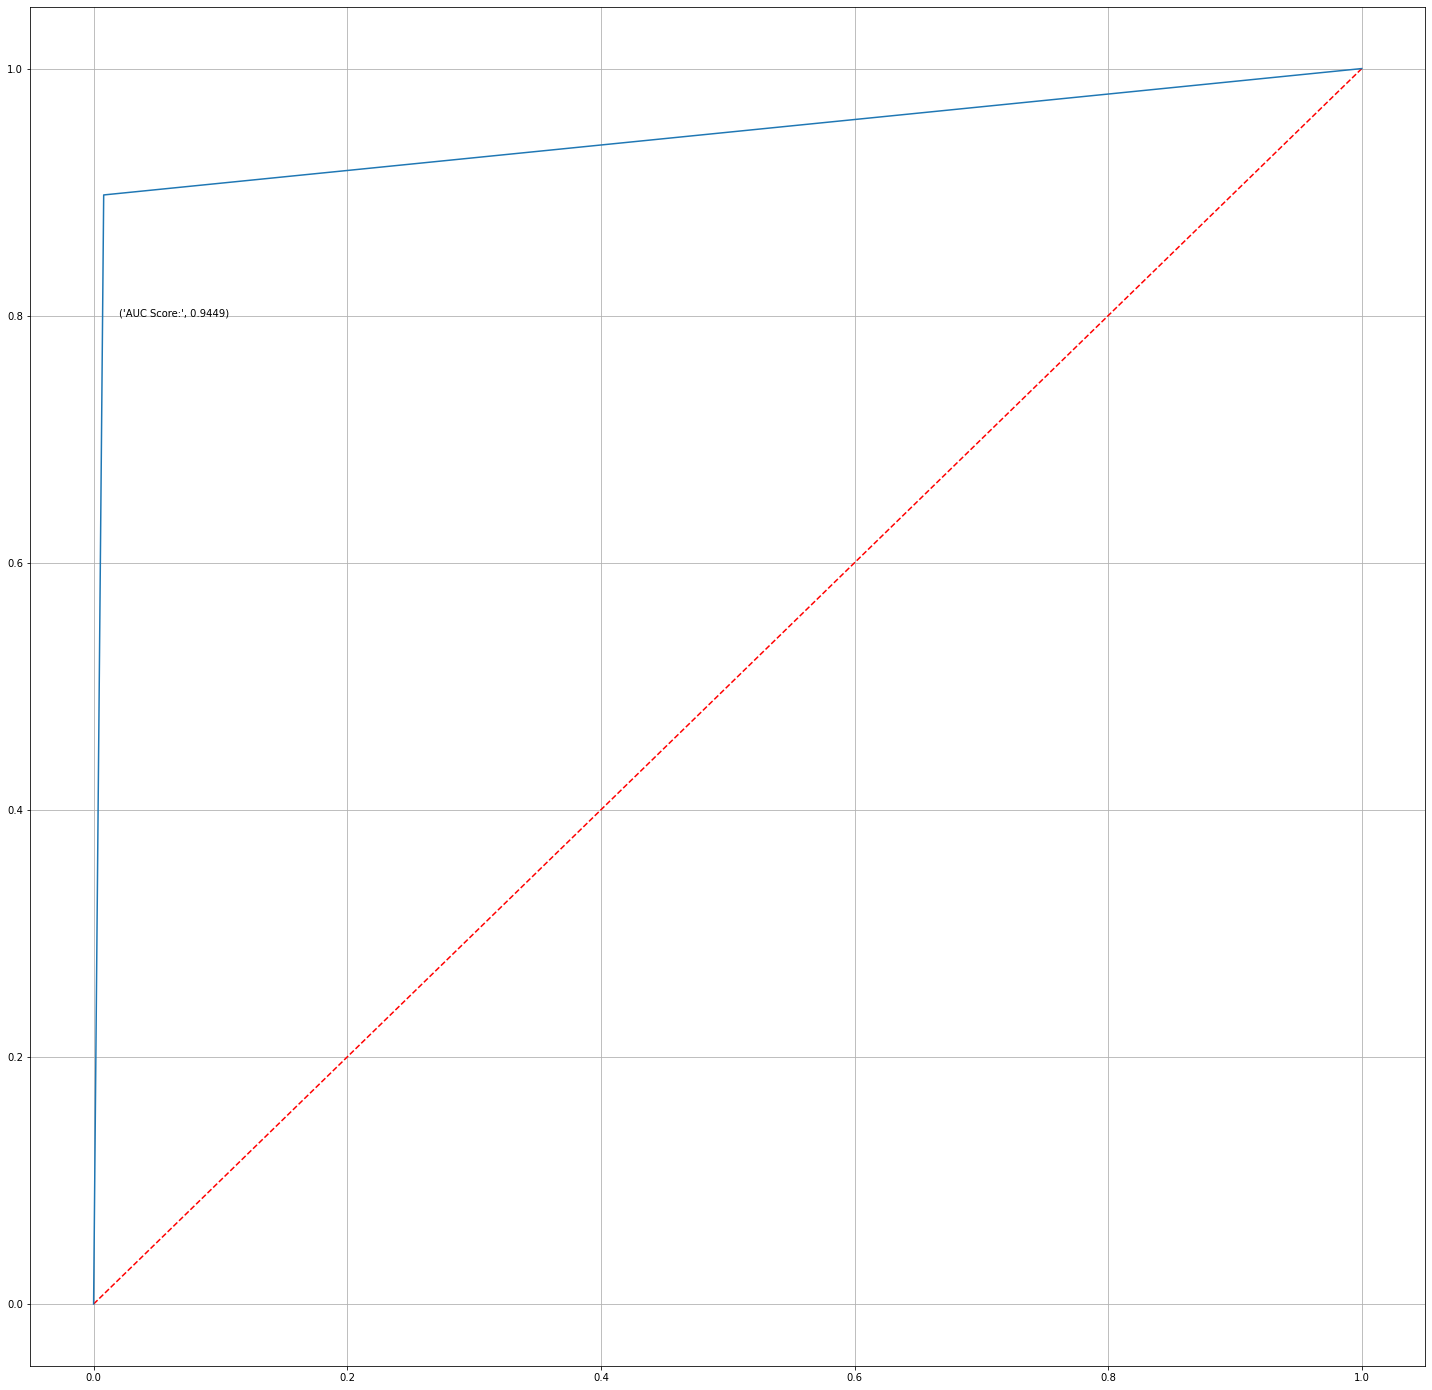

In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf_tuned),4)))
                            
plt.grid(True)

# Random Forest with significant features

Finding important features

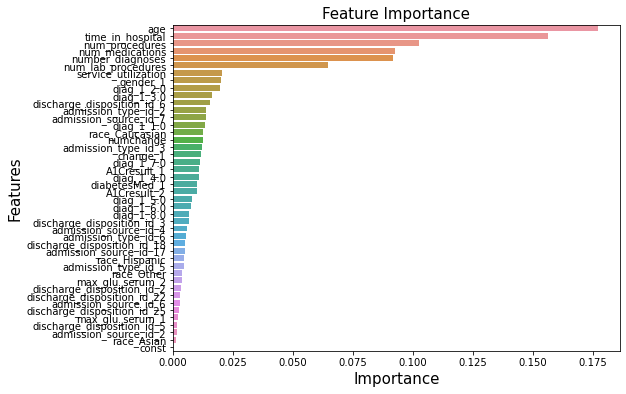

In [314]:
random_forest_tuned_model_significant = RandomForestClassifier(criterion = 'entropy', max_depth = 20, 
                                                   min_samples_split = 2, n_estimators = 150,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model_significant = random_forest_tuned_model_significant.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model_significant.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [213]:
important_columns = list(important_features['Features'].iloc[:10])

# use fit() to fit the model on the train set
random_forest_tuned_model_significant = random_forest_tuned_model_significant.fit(X_train[important_columns], y_train)

# predict the attrition for test set
y_pred_rf_sf = random_forest_tuned_model_significant.predict(X_test[important_columns])

In [214]:

print(classification_report(y_test, y_pred_rf_sf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10692
           1       1.00      0.90      0.95     10656

    accuracy                           0.95     21348
   macro avg       0.95      0.95      0.95     21348
weighted avg       0.95      0.95      0.95     21348



In [215]:
cm = confusion_matrix(y_test, y_pred_rf_sf)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9482387108862657


In [216]:
kappa = cohen_kappa_score(y_test, y_pred_rf_sf)
print('kappa value:',kappa)

kappa value: 0.896459117180314


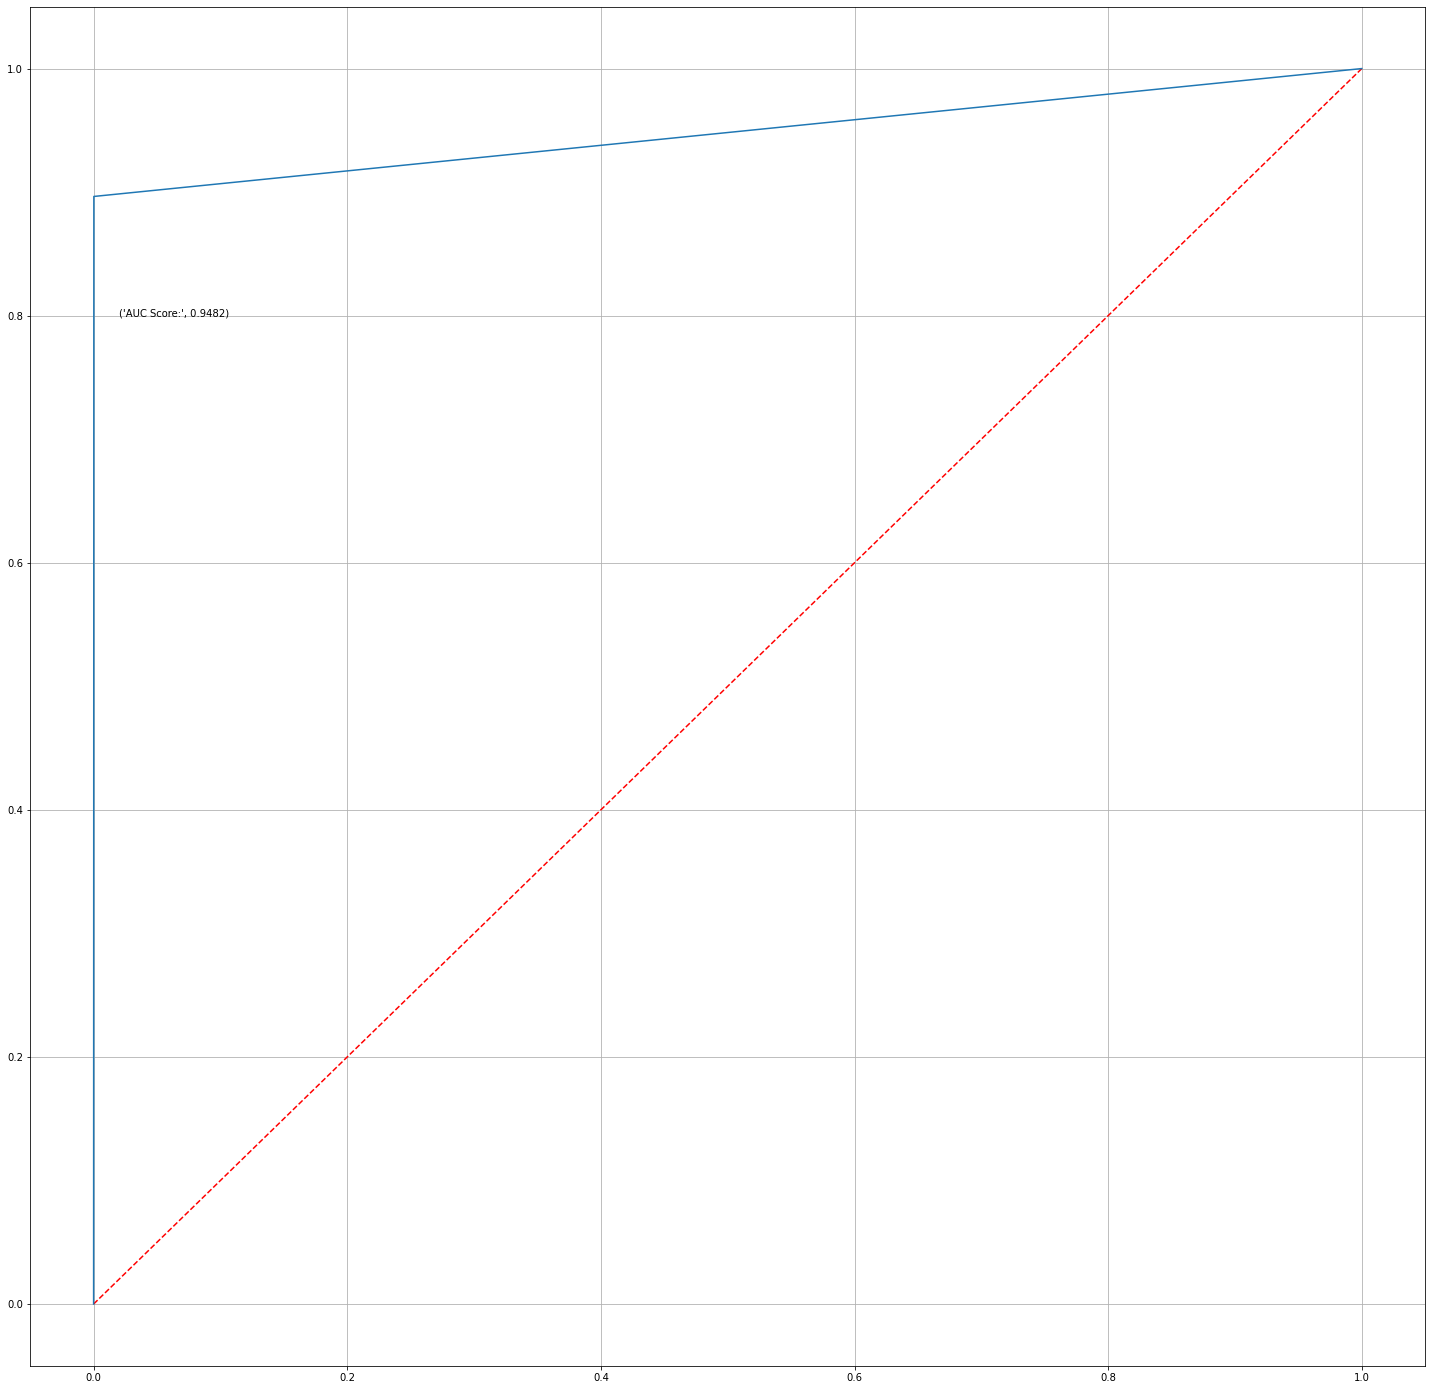

In [217]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_sf)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf_sf),4)))
                            
plt.grid(True)

Random forest algorithm with only top 10 significant features shows slight improvement over the RF algorithm will all features.

AUC score is found to be improved from 94.49 to 94.82.

# AdaBoost

In [218]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [219]:
y_pred_ada = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10692
           1       0.93      0.89      0.91     10656

    accuracy                           0.91     21348
   macro avg       0.91      0.91      0.91     21348
weighted avg       0.91      0.91      0.91     21348



In [220]:
kappa = cohen_kappa_score(y_test, y_pred_ada)
print('kappa value:',kappa)

kappa value: 0.8261046524488319


In [221]:
cm = confusion_matrix(y_test, y_pred_ada)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9130597714071575


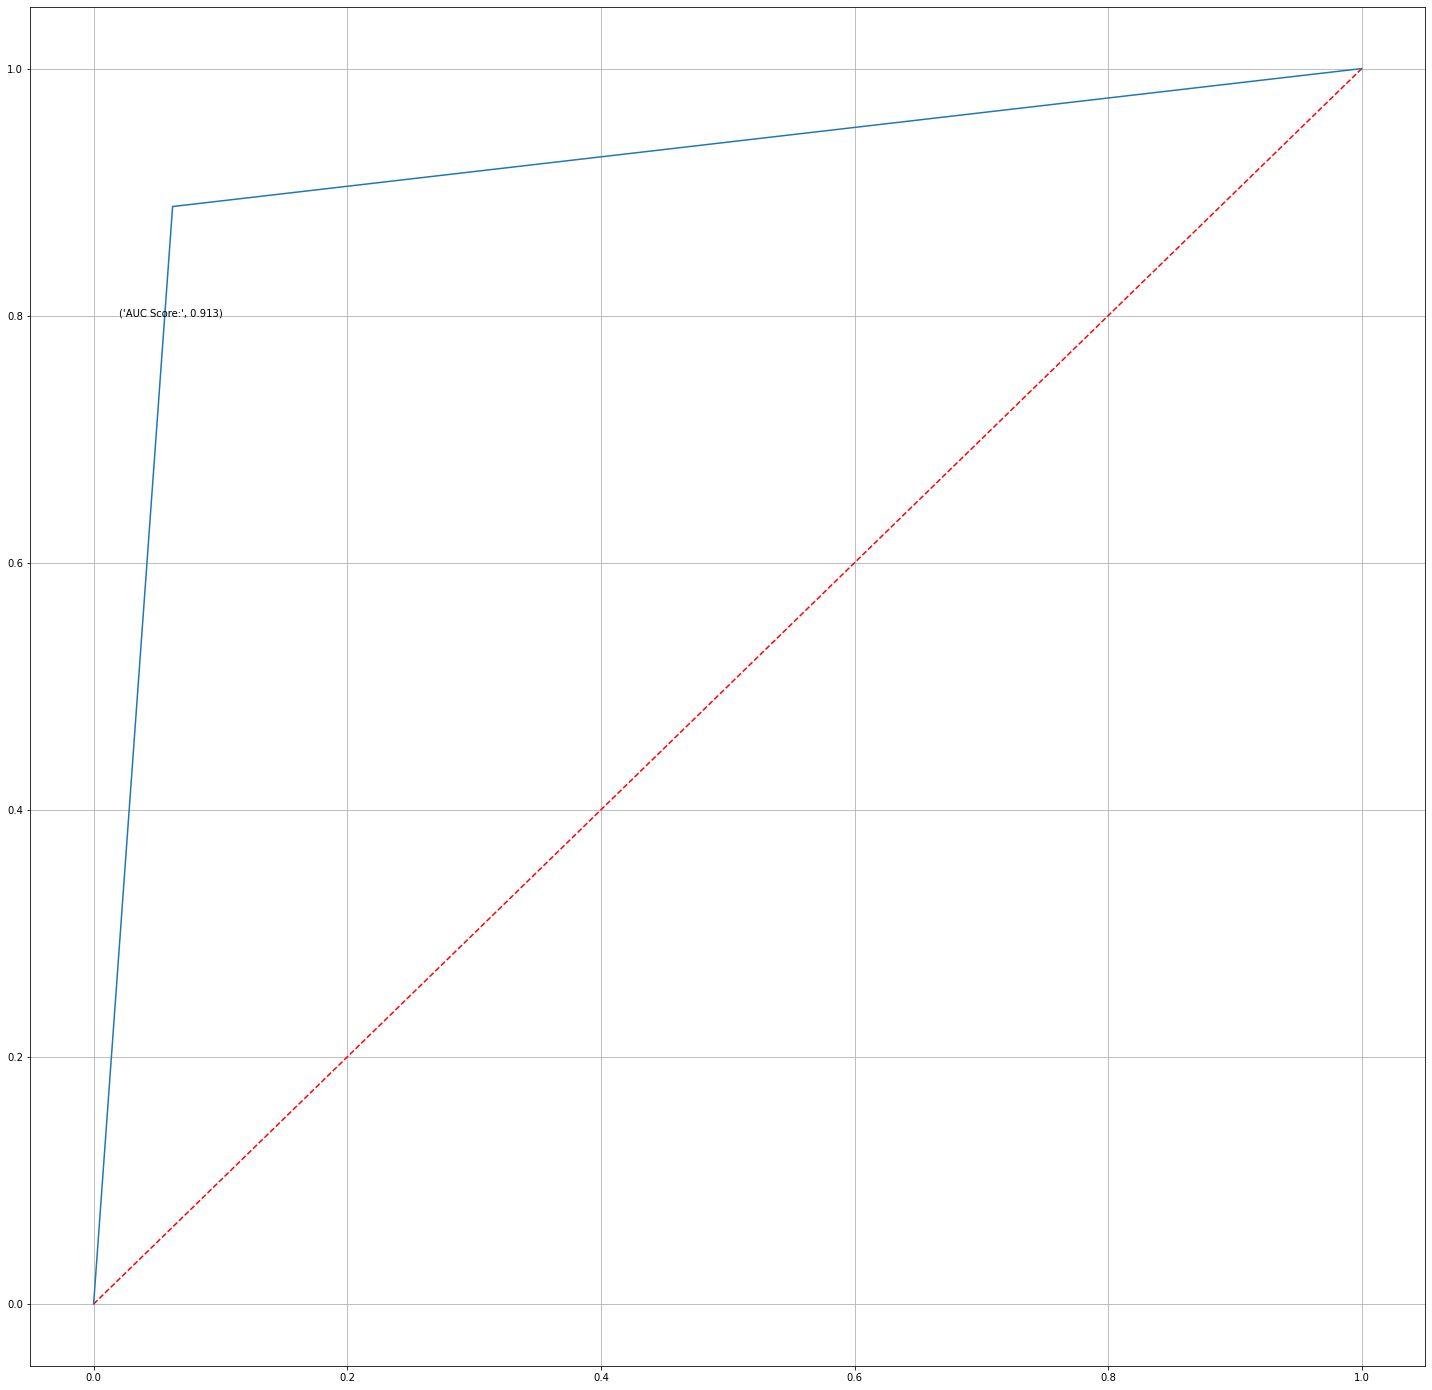

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_ada),4)))
                            
plt.grid(True)

# Gradient Boosting

In [223]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [224]:
y_pred_gboost = gboost_model.predict(X_test)

print(classification_report(y_test, y_pred_gboost))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10692
           1       1.00      0.91      0.95     10656

    accuracy                           0.95     21348
   macro avg       0.96      0.95      0.95     21348
weighted avg       0.95      0.95      0.95     21348



In [225]:
kappa = cohen_kappa_score(y_test, y_pred_gboost)
print('kappa value:',kappa)

kappa value: 0.90264573623286


In [226]:
cm = confusion_matrix(y_test, y_pred_gboost)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9513303353944164


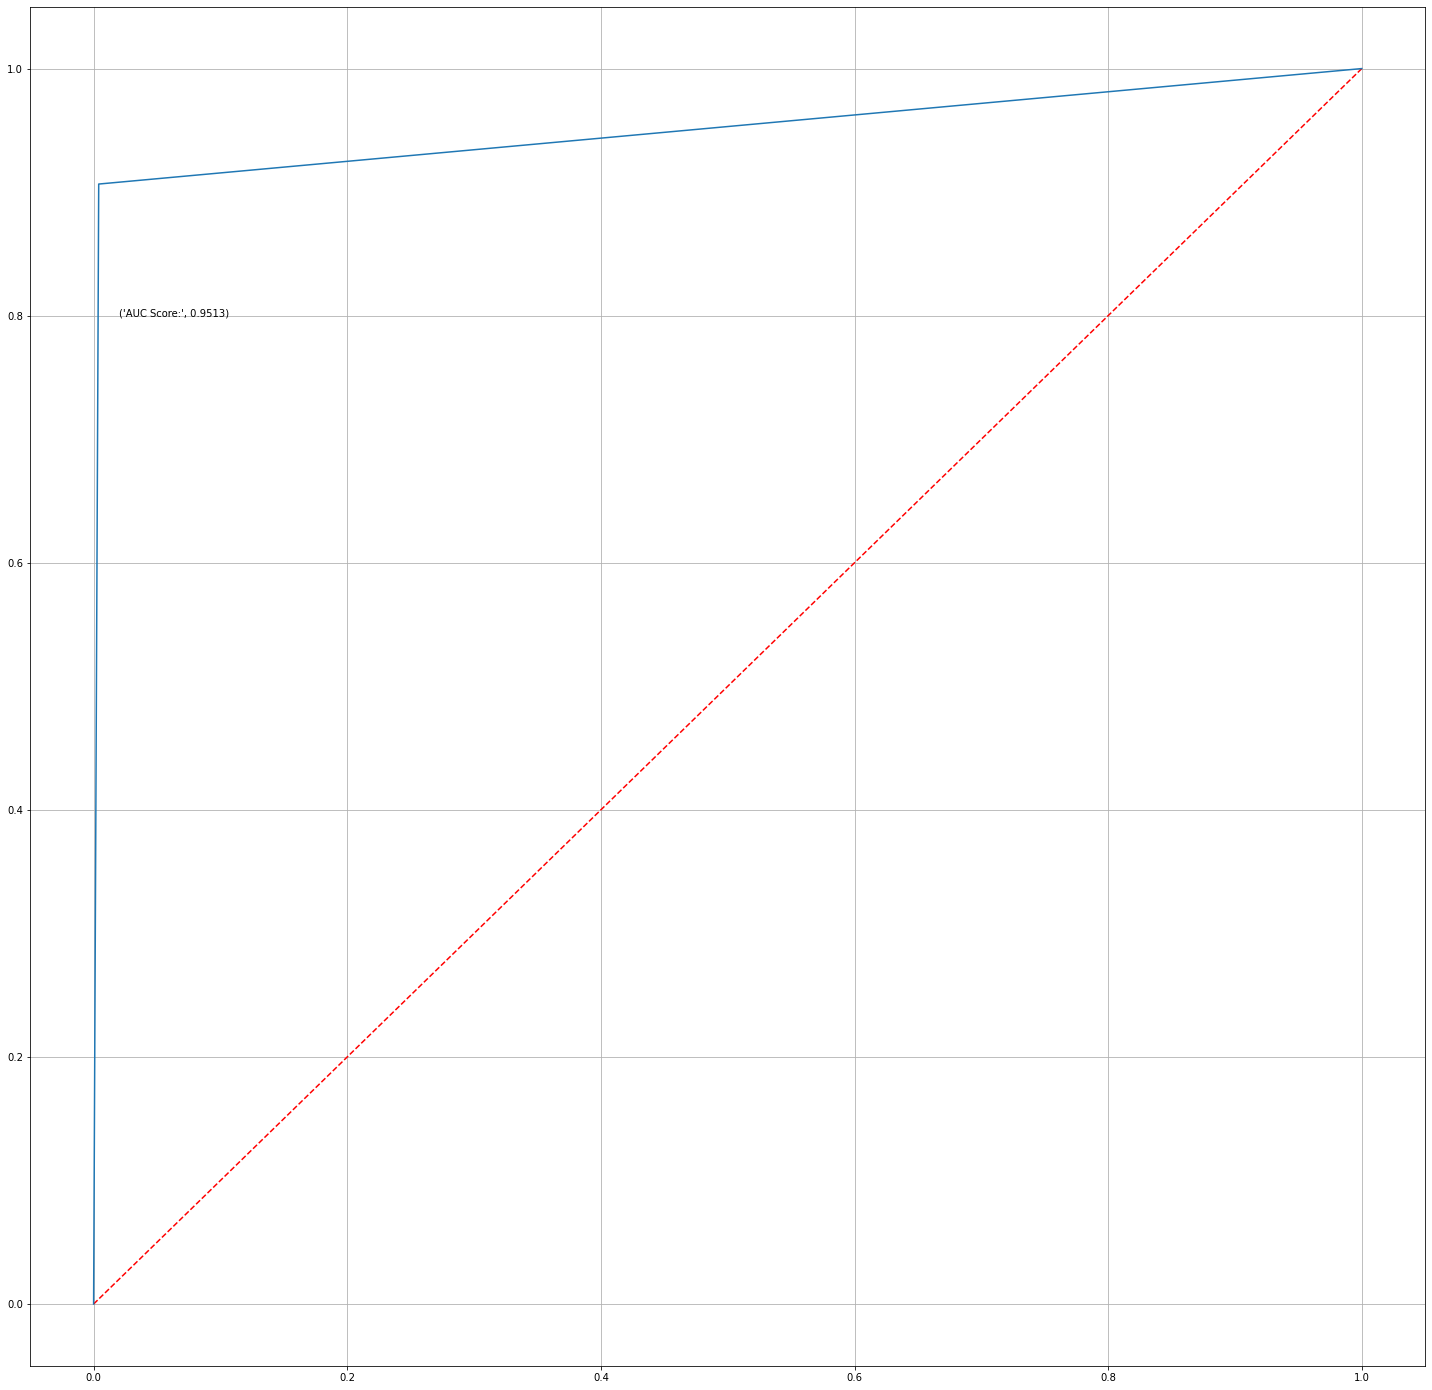

In [227]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gboost)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_gboost),4)))
                            
plt.grid(True)

# XGBoost

In [228]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [229]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10692
           1       0.99      0.91      0.95     10656

    accuracy                           0.95     21348
   macro avg       0.95      0.95      0.95     21348
weighted avg       0.95      0.95      0.95     21348



In [230]:
cm = confusion_matrix(y_test, y_pred_xgb)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.95100243582537


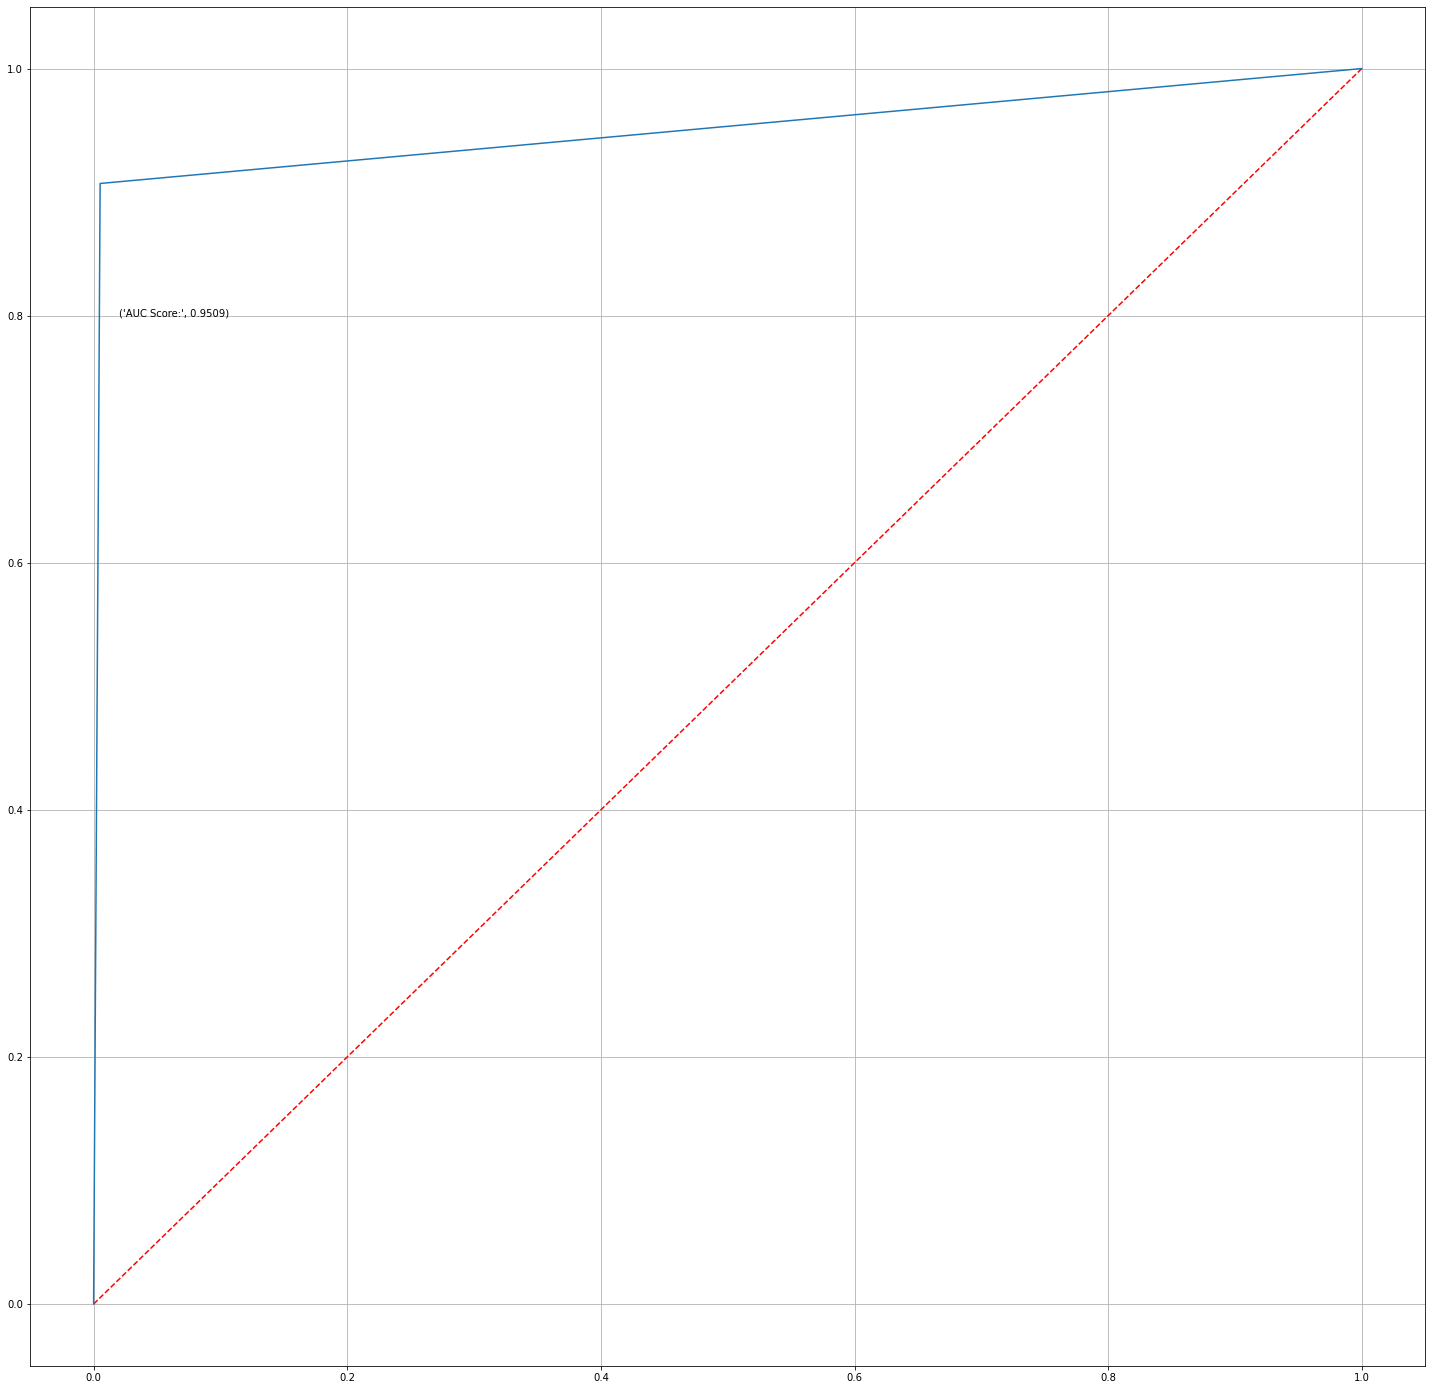

In [231]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_xgb),4)))
                            
plt.grid(True)

In [232]:
kappa = cohen_kappa_score(y_test, y_pred_xgb)
print('kappa value:',kappa)

kappa value: 0.9019900997483222


# Model Evaluation

# K-fold Cross Valiation

In [239]:
logreg = LogisticRegression() 
logreg_scores = cross_val_score(logreg, X , y, cv=10, scoring='accuracy')
logreg_scores

array([0.5       , 0.5       , 0.5       , 0.5       , 0.68877647,
       0.5       , 0.63012929, 0.80532134, 0.54127237, 0.44879603])

In [240]:
X_train_rfe = X_train_full[['age', 'time_in_hospital', 'num_medications',
       'number_diagnoses', 'service_utilization', 'gender_1',
       'admission_source_id_7', 'diag_1_1.0', 'change_1']]
logreg_rfe = LogisticRegression() 
logreg_rfe_scores = cross_val_score(logreg_rfe, X_train_rfe , y_train_rfe, cv=10, scoring='accuracy')
logreg_rfe_scores

array([0.68567748, 0.68520904, 0.69586603, 0.69399227, 0.68520904,
       0.67619159, 0.68766835, 0.69328961, 0.68801967, 0.67853379])

In [241]:
dtc = DecisionTreeClassifier(criterion='entropy')

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

dtc_score = cross_val_score(dtc, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(dtc_score)
print('Cross-Val Score: ' ,dtc_score.mean())

[0.90406595 0.90987446 0.9037849  0.90369121 0.90884392 0.910905
 0.90650178 0.90453438 0.90227677 0.90883538]
Cross-Val Score:  0.9063313763551821


In [243]:
rfcl = RandomForestClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

rfcl_score = cross_val_score(rfcl, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(rfcl_score)
print('Cross-Val Score: ' ,rfcl_score.mean())

[0.94772344 0.9493161  0.94744238 0.94894135 0.95062769 0.95137718
 0.94950347 0.95184561 0.94818701 0.94977982]
Cross-Val Score:  0.9494744047857615


In [244]:
abc = AdaBoostClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

abc_score = cross_val_score(abc, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(abc_score)
print('Cross-Val Score: ' ,abc_score.mean())

[0.91858722 0.91774405 0.91596402 0.91811879 0.91877459 0.91671351
 0.92027356 0.92626944 0.91604985 0.91857959]
Cross-Val Score:  0.9187074632699902


In [245]:
gbc = GradientBoostingClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

gbc_score = cross_val_score(gbc, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(gbc_score)
print('Cross-Val Score: ' ,gbc_score.mean())

[0.93620011 0.93638748 0.9317032  0.93891699 0.93704328 0.94238336
 0.93732434 0.94238336 0.93769324 0.94050408]
Cross-Val Score:  0.938053946011995


In [246]:
xgbc = XGBClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

xgbc_score = cross_val_score(xgbc, X, y , cv=kfold, scoring='accuracy', n_jobs=-1)

print(xgbc_score)
print('Cross-Val Score: ' ,xgbc_score.mean())

[0.95118981 0.95184561 0.94884767 0.95147086 0.95353195 0.95334458
 0.95137718 0.95371932 0.94931135 0.95362129]
Cross-Val Score:  0.9518259596461845


Text(0.5, 1.0, 'Mean of Cross validation score  vs model')

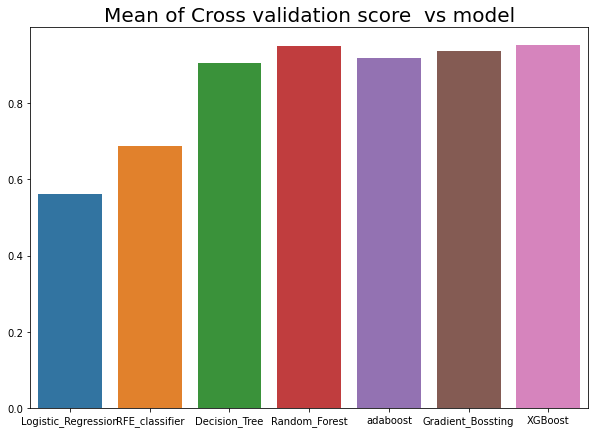

In [266]:
scores = []

scores.append(logreg_scores.mean())
scores.append(logreg_rfe_scores.mean())
scores.append(dtc_score.mean())
scores.append(rfcl_score.mean())
scores.append(abc_score.mean())
scores.append(gbc_score.mean())
scores.append(xgbc_score.mean())

names = ['Logistic_Regression', 'RFE_classifier', 'Decision_Tree', 'Random_Forest', 'adaboost', 'Gradient_Bossting', 'XGBoost']


fig = plt.figure(figsize=(10,7))
sns.barplot(x=names, y = scores)

plt.title('Mean of Cross validation score  vs model', fontsize = 20)




# Conclusion

Best cross validation score is observed for random forest algorithm.

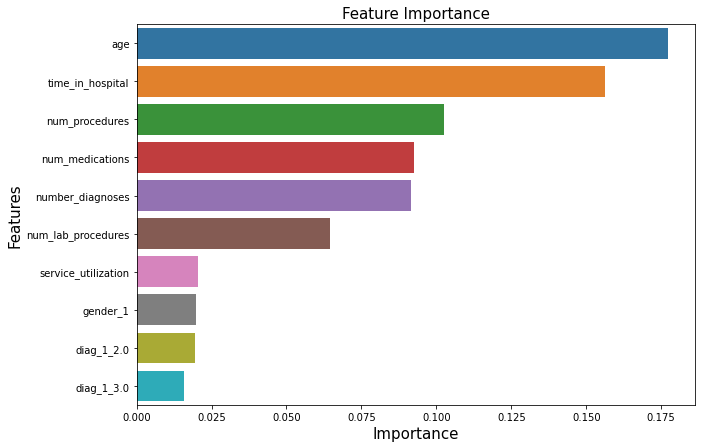

In [315]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x = important_features['Importance'][:10], y = important_features['Features'][:10], data = important_features)

# add plot and axes labels
# set text size using 'fontsize'


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### 1. Age

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

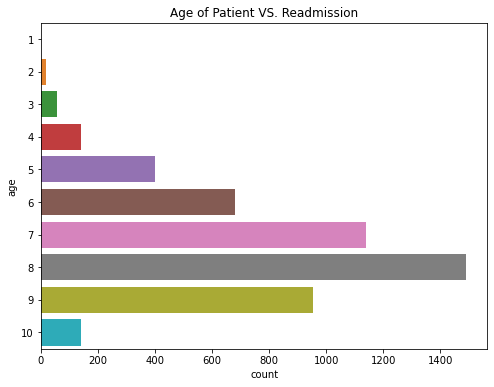

In [292]:
sns.countplot(y= df1['age'][df1['readmitted']==1]).set_title('Age of Patient VS. Readmission')

The count of patients of Age group (70-80) is highest among all the age group.

The patients above age 40 need more attention since they are more likely to get readmitted within 30 days of discharge.

### 2. Time spent in hospitals

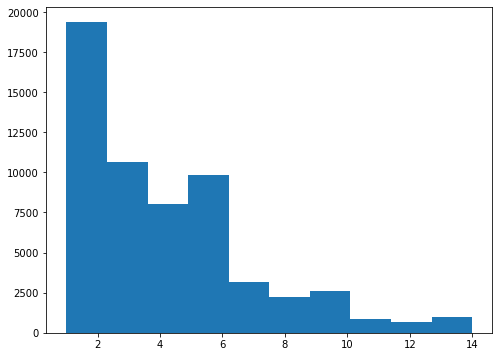

In [316]:
plt.hist(df1['time_in_hospital'], bins=10)
plt.show()

It implies that hospitals need to keep the patients under observation for more than 6 days at least.

### 3. Number of procedures

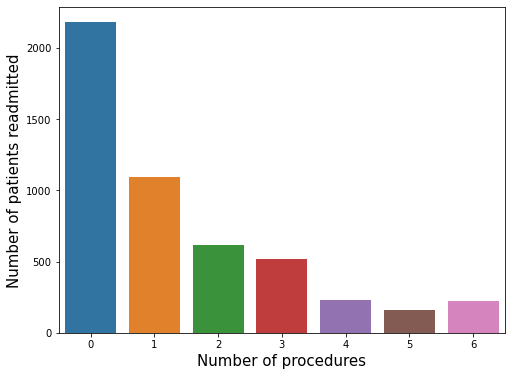

In [287]:
plt.rcParams["figure.figsize"] = [8,6]
ax = sns.countplot(data=df1, x=df1['num_procedures'][df1['readmitted']==1])
ax.set_ylabel('Number of patients readmitted', fontsize=15)
ax.set_xlabel('Number of procedures', fontsize=15)
plt.show()

The patients who were having diseases in which the number of procedures during the treatment are less, those patients are more suceptible for readmission into the hospital.

### 4. Number of changes in prescribed medications

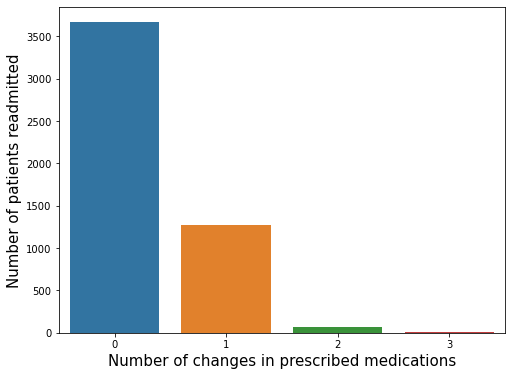

In [288]:
plt.rcParams["figure.figsize"] = [8,6]
ax = sns.countplot(data=df1, x=df1['numchange'][df1['readmitted']==1])
ax.set_ylabel('Number of patients readmitted', fontsize=15)
ax.set_xlabel('Number of changes in prescribed medications', fontsize=15)
plt.show()

Patients for whom the medications were not changed during the tratment, the count of such patients is highest in readmission.
It implies that hospitals need to find alternatives for the prescribed medications that are currently in practice.

### 5. Number of diagnoses

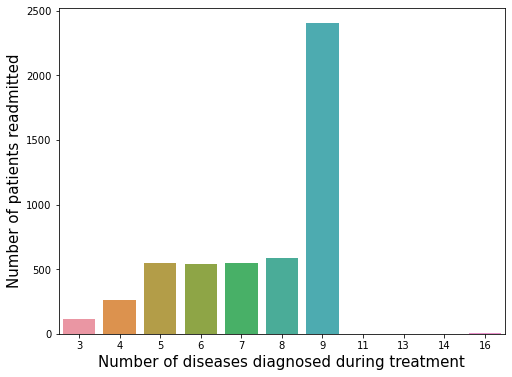

In [294]:
plt.rcParams["figure.figsize"] = [8,6]
ax = sns.countplot(data=df1, x=df1['number_diagnoses'][df1['readmitted']==1])
ax.set_ylabel('Number of patients readmitted', fontsize=15)
ax.set_xlabel('Number of diseases diagnosed during treatment', fontsize=15)
plt.show()

The patients with many diseases diagnosed during the treatment (greater than 5) are more likely to be readmitted again.

### 6. Number of lab procedures

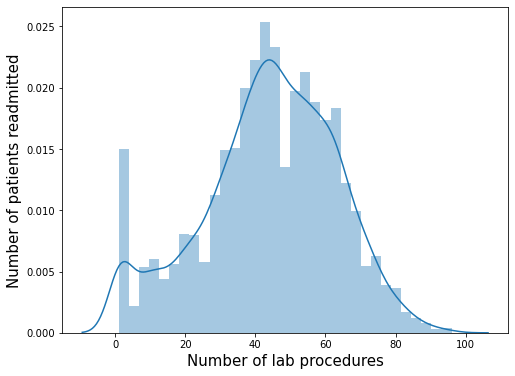

In [320]:
plt.rcParams["figure.figsize"] = [8,6]
ax = sns.distplot(x=df1['num_lab_procedures'][df1['readmitted']==1])
ax.set_ylabel('Number of patients readmitted', fontsize=15)
ax.set_xlabel('Number of lab procedures', fontsize=15)
plt.show()

The patients who have gone through 35 to 70 lab procedures during the tratment are found to be more suceptible for readmission.

### 7. Service Utilization

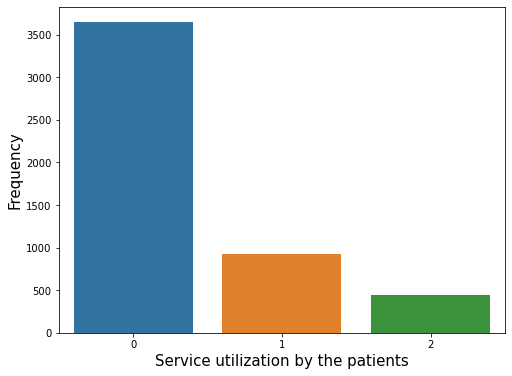

In [323]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=df1, x=df1['service_utilization'][df1['readmitted']==1])
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Service utilization by the patients', fontsize=15)
plt.show()

The patients who have not utilized the healthcare facilities in the hospitals before are likely to be readmitted again into the hospital within 30 days after discharge.

### 8.Gender

Female patients are more suceptible for readmission after 30 days of discharge.

### 9. diag_1_2.0 Patients with respiratory diseases

Patients who were diagnosed with diseases belonging to respiratory category (ICD9: 460–519, 786) are likely to be readmitted.

### 10. diag_1_3.0 Patients with digestive diseases

Followed by respiratiory diseases patients, the patients who were diagnosed with diseases belonging to digestive category (ICD9:  520–579, 787) are more suceptible to be readmitted again into the hospital after 30 days of discharge.